# BLACK FRIDAY SALES PREDICTION

IMPORT LIBRARIES

In [229]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
import statistics 

IMPORT DATASET

In [2]:
#Train set csv
data = pd.read_csv("train.csv")

#Test set csv
test = pd.read_csv("test.csv")

DATASET COLUMNS

In [3]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [4]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


STATISTICAL DETAILS OF DATASET

In [5]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


SIZE OF DATASET [ROWS,COLUMNS]

In [6]:
data.shape

(550068, 12)

DATASET COLUMN INFO 

In [7]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

UNIQUE VALUES OF DATASET COLUMNS

In [8]:
data.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

In [9]:
#Replacing the Value '4+' in column 'Stay_In_Current_City_Years' with 4

In [10]:
data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].map({'0':0, '1':1, '2':2, '3':3 ,'4+':4})
test['Stay_In_Current_City_Years'] = test['Stay_In_Current_City_Years'].map({'0':0, '1':1, '2':2, '3':3 ,'4+':4})
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [11]:
#CHECKING THE DTYPE OF THE FEATURES

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  int64  
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 50.4+ MB


# CLEANING THE DATA

In [13]:
#Check the percentage of Nan in dataset
total = data.isnull().sum().sort_values(ascending=False)
missing_data = pd.concat([total], axis=1, keys=['Total'])
missing_data

,Total
Product_Category_3,383247
Product_Category_2,173638
Purchase,0
Product_Category_1,0
Marital_Status,0
Stay_In_Current_City_Years,0
City_Category,0
Occupation,0
Age,0
Gender,0


In [14]:
#ONLY "Product_Category_2" and "Product_Category_3" columns consist of NULL Values

In [15]:
#Filling missing data with -1 in training set
data["Product_Category_2"].fillna(-1, inplace = True) 
data["Product_Category_3"].fillna(-1, inplace = True) 

#Filling missing data with -1 in testing set
test["Product_Category_2"].fillna(-1, inplace = True) 
test["Product_Category_3"].fillna(-1, inplace = True) 

In [16]:
#Checking if the NULL values are filled or not
data.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [17]:
dro

#Drop dublicate rows in test set
test.drop_duplicates(keep='first',inplace=True) 

#Checking the Shape of data
data.shape

(550068, 12)

DROP COLUMN 'Product_ID' 

In [18]:
#DROP 'Product_ID' column as it can be described 
#in product categories column in train set
data.drop(['Product_ID'], axis = 1, inplace=True) 

#DROP 'Product_ID' column as it can be described 
#in product categories column in test set
test.drop(['Product_ID'], axis = 1, inplace=True) 

DROP COLUMN 'User_ID' 

In [19]:
#DROP 'User_ID' column in train set
data.drop(['User_ID'], axis = 1, inplace=True) 

#DROP 'User_ID' column  in test set
test.drop(['User_ID'], axis = 1, inplace=True) 

# SPLIT THE DATA INTO TRAINING SET AND TESTING SET

In [20]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data,test_size=.20,shuffle=False,random_state=42)
data_train

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,-1.0,-1.0,8370
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,F,0-17,10,A,2,0,12,-1.0,-1.0,1422
3,F,0-17,10,A,2,0,12,14.0,-1.0,1057
4,M,55+,16,C,4,0,8,-1.0,-1.0,7969
...,...,...,...,...,...,...,...,...,...,...
440049,F,18-25,4,C,3,0,8,14.0,-1.0,6008
440050,F,18-25,4,C,3,0,5,8.0,-1.0,8697
440051,M,26-35,0,B,4,0,2,17.0,-1.0,16082
440052,M,26-35,0,B,4,0,1,2.0,8.0,15528


<blockquote>
<b> CHECK IF ALL THE CATEGORICAL COLUMNS IN THE TRAIN / VALIDATION / TEST SET HAS SAME COUNT OF UNIQUE VALUES</b><br>
<b>IF YES: </b> <i>We can proceed without the need of handling anything</i><br>
<b>IF NO: </b> <i>We need to handle the categorical columns because we migh face</i>
    <ul> 
        <li>Target Leakage </li>
        <li>Uneven shape of dataframe during One-Hot-Encoding</li>
        <li>Uneven label of categorical values during Label Encoding</li>
    </ul>
</blockquote>

In [21]:
uniqueValues = pd.DataFrame({
    'TrainSet':data_train.nunique(),
    'ValidationSet':data_test.nunique(),
    'TestSet':test.nunique()
})
uniqueValues

,TrainSet,ValidationSet,TestSet
Age,7,7,7.0
City_Category,3,3,3.0
Gender,2,2,2.0
Marital_Status,2,2,2.0
Occupation,21,21,21.0
Product_Category_1,18,20,18.0
Product_Category_2,18,18,18.0
Product_Category_3,16,16,16.0
Purchase,17582,14245,NaN
Stay_In_Current_City_Years,5,5,5.0


<b> As all the categorical columns have same unique values, we can move ahead </b> 

In [22]:
#Size of the training set
data_train.shape

(440054, 10)

In [23]:
#Size of the validation set
data_test.shape

(110014, 10)

CREATE CORRELATION MATRIX AND CHECK THE RELATIONS BETWEEN EACH COLUMN

In [24]:
# Create correlation matrix
corr_matrix = data_train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features 
data_train.drop(to_drop, axis=1, inplace=True)
corr_matrix

C:\Users\ankit.banerjee\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
Occupation,1.000000,0.031424,0.023075,0.008216,0.006446,0.012492,0.021184
Stay_In_Current_City_Years,0.031424,1.000000,0.011592,0.003264,0.002676,0.001477,0.005415
Marital_Status,0.023075,0.011592,1.000000,0.019636,0.000109,0.004957,0.000850
Product_Category_1,0.008216,0.003264,0.019636,1.000000,0.067826,0.395630,0.313558
Product_Category_2,0.006446,0.002676,0.000109,0.067826,1.000000,0.110577,0.052653
Product_Category_3,0.012492,0.001477,0.004957,0.395630,0.110577,1.000000,0.287091
Purchase,0.021184,0.005415,0.000850,0.313558,0.052653,0.287091,1.000000


# Performing Exploratory data analysis

VISUALIZATION OF CORRELATION OF FEATURES

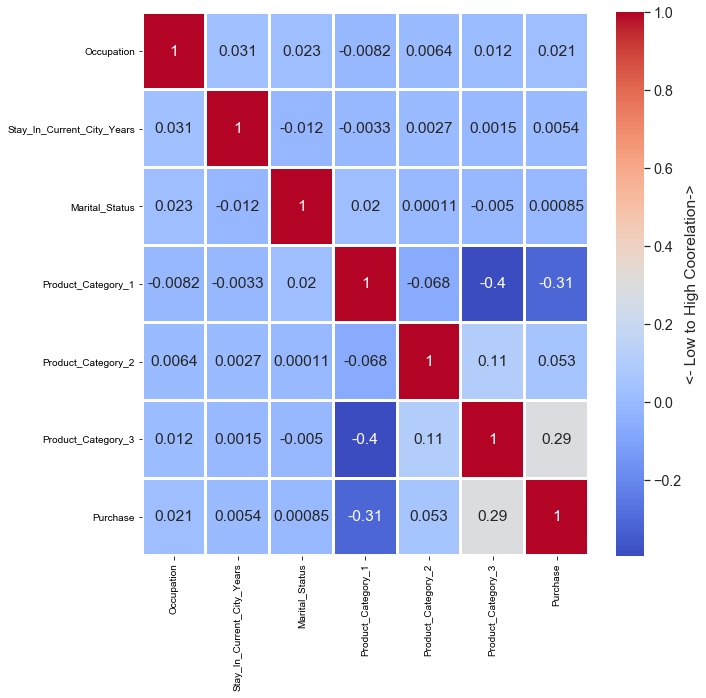

In [25]:
#Creating heatmap for visualizing correlation
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
sns.set(font_scale=1.3)
sns.heatmap(data_train.corr(),cmap='coolwarm',ax=ax,annot=True,linewidths=2,cbar_kws={'label': '<- Low to High Coorelation->'})

COUNT OF PURCHASES DONE BY USER IN PRODUCT CATEGORY 1

Text(0.5, 1.0, 'COUNT OF PURCHASES DONE BY USERS IN PRODUCT CATEGORY 1')

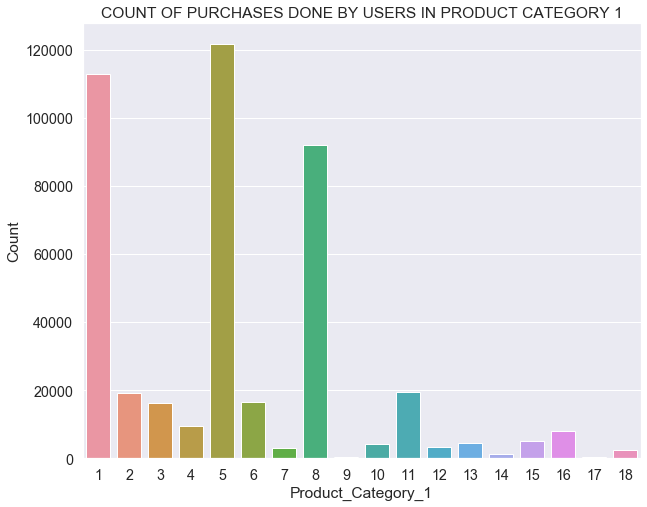

In [26]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
sns.countplot('Product_Category_1', data=data_train)
plt.xlabel("Product_Category_1")
plt.ylabel("Count")
plt.title("COUNT OF PURCHASES DONE BY USERS IN PRODUCT CATEGORY 1")

COUNT OF PURCHASES DONE BY USER IN PRODUCT CATEGORY 2

Text(0.5, 1.0, 'COUNT OF PURCHASES DONE BY USERS IN PRODUCT CATEGORY 2')

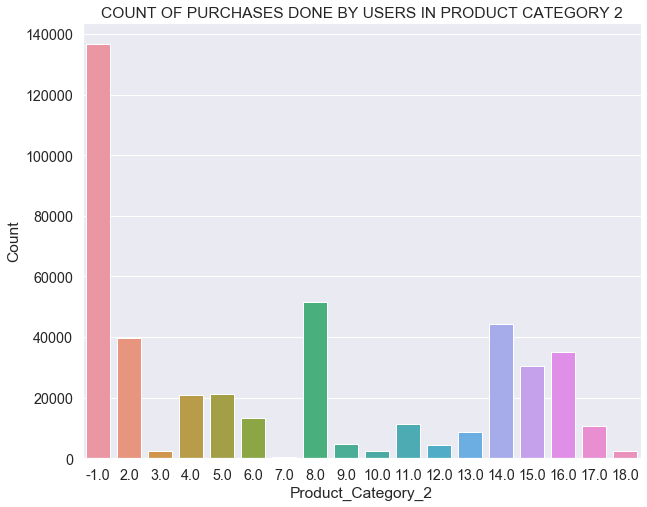

In [27]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
sns.countplot('Product_Category_2', data=data_train)
plt.xlabel("Product_Category_2")
plt.ylabel("Count")
plt.title("COUNT OF PURCHASES DONE BY USERS IN PRODUCT CATEGORY 2")

COUNT OF PURCHASES DONE BY USER IN PRODUCT CATEGORY 3

Text(0.5, 1.0, 'COUNT OF PURCHASES DONE BY USERS IN PRODUCT CATEGORY 3')

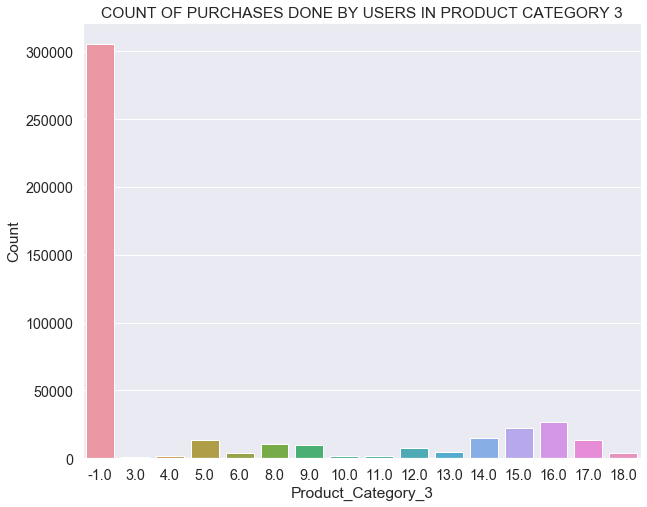

In [28]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
sns.countplot('Product_Category_3', data=data_train)
plt.xlabel("Product_Category_3")
plt.ylabel("Count")
plt.title("COUNT OF PURCHASES DONE BY USERS IN PRODUCT CATEGORY 3")

<b> In the above graph, the bar-plot at 0th position means no purchase</b>

Text(0.5, 1.0, "Mean of Purchase in each category of 'Product_Category_1'")

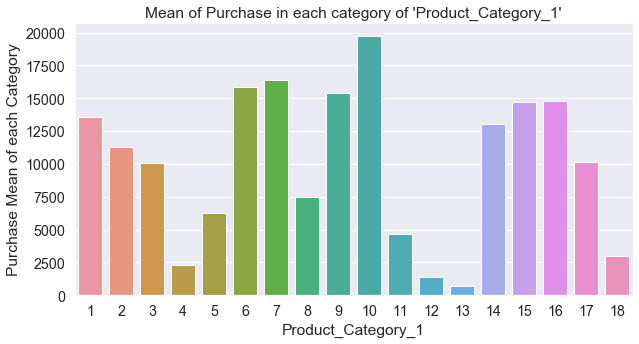

In [29]:
#Mean of purchase of each product category 1
df2 = data_train.groupby('Product_Category_1').Purchase.mean().to_frame()
df2.reset_index(inplace=True)
f, ax = plt.subplots(figsize=(10,5))
sns.barplot(x='Product_Category_1', y='Purchase', data=df2);
plt.xlabel("Product_Category_1")
plt.ylabel("Purchase Mean of each Category")
plt.title("Mean of Purchase in each category of 'Product_Category_1'")

Text(0.5, 1.0, "Mean of Purchase in each category of 'Product_Category_2")

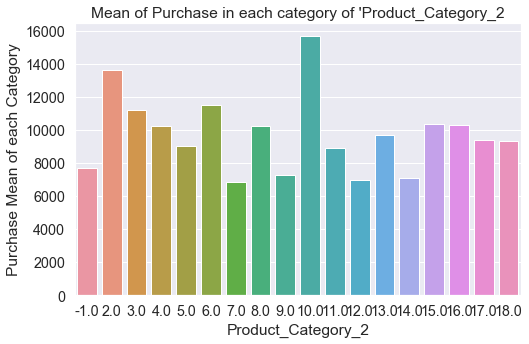

In [30]:
#Mean of purchase of each product category 2
df2 = data_train.groupby('Product_Category_2').Purchase.mean().to_frame()
df2.reset_index(inplace=True)
f, ax = plt.subplots(figsize=(8,5))
sns.barplot(x='Product_Category_2', y='Purchase', data=df2);
plt.xlabel("Product_Category_2")
plt.ylabel("Purchase Mean of each Category")
plt.title("Mean of Purchase in each category of 'Product_Category_2")

Text(0.5, 1.0, "Mean of Purchase in each category of 'Product_Category_3")

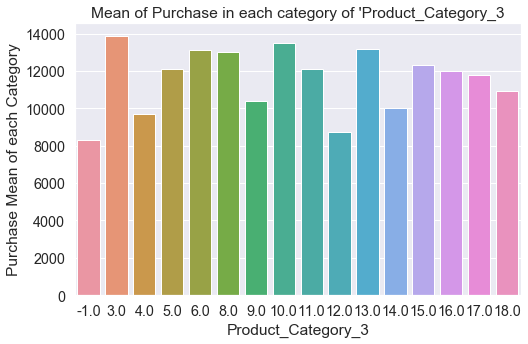

In [31]:
#Mean of purchase of each product category 3
df2 = data_train.groupby('Product_Category_3').Purchase.mean().to_frame()
df2.reset_index(inplace=True)
f, ax = plt.subplots(figsize=(8,5))
sns.barplot(x='Product_Category_3', y='Purchase', data=df2);
plt.xlabel("Product_Category_3")
plt.ylabel("Purchase Mean of each Category")
plt.title("Mean of Purchase in each category of 'Product_Category_3")

# Following 3 graph form similar pattern (used for binning 'Product_Category_3')

Text(0.5, 1.0, 'Grouping Gender and Product_Category_3')

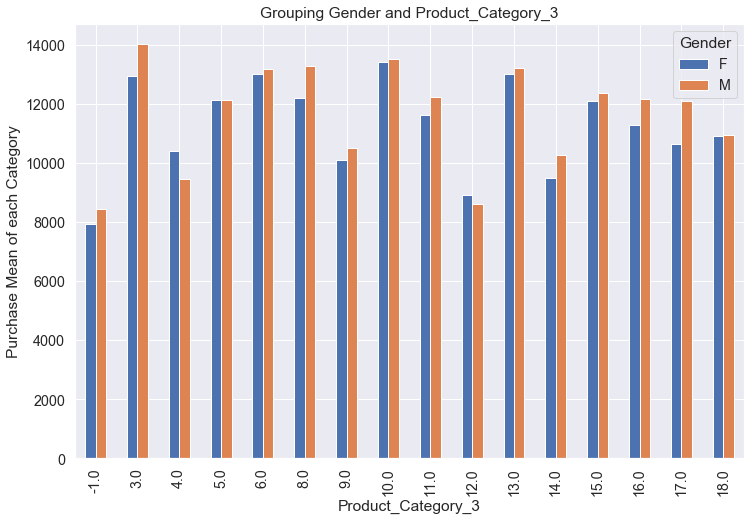

In [32]:
#Created a pivot table chart to represent the mean purchase of each product labelled in 
#'Product_Category_3' w.r.t 'Gender for a better understanding of Gender preferences on product categories'
pd.pivot_table(data_train, values = 'Purchase', index = 'Product_Category_3',
               columns = 'Gender',aggfunc ='mean').plot.bar(figsize=(12,8))
plt.xlabel("Product_Category_3")
plt.ylabel("Purchase Mean of each Category")
plt.title("Grouping Gender and Product_Category_3")

Text(0.5, 1.0, 'Grouping Age and Product_Category_3')

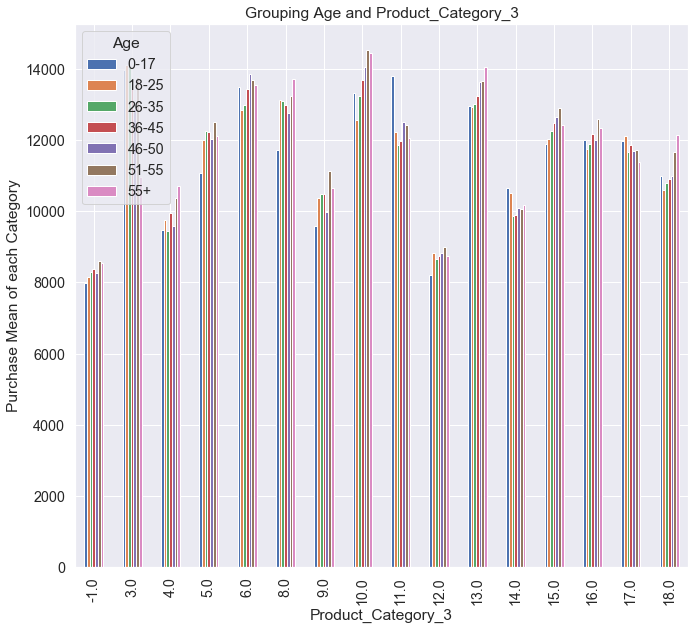

In [33]:
#Created a pivot table chart to represent the mean purchase of each product labelled in 
#'Product_Category_3' w.r.t 'Age' for a better understanding of Age group preferences on product categories'
pd.pivot_table(data_train, values = 'Purchase', index = 'Product_Category_3',
               columns = 'Age',aggfunc ='mean').plot.bar(figsize=(11,10))
plt.xlabel("Product_Category_3")
plt.ylabel("Purchase Mean of each Category")
plt.title("Grouping Age and Product_Category_3")

Text(0.5, 1.0, 'Grouping Occupation and Product_Category_3')

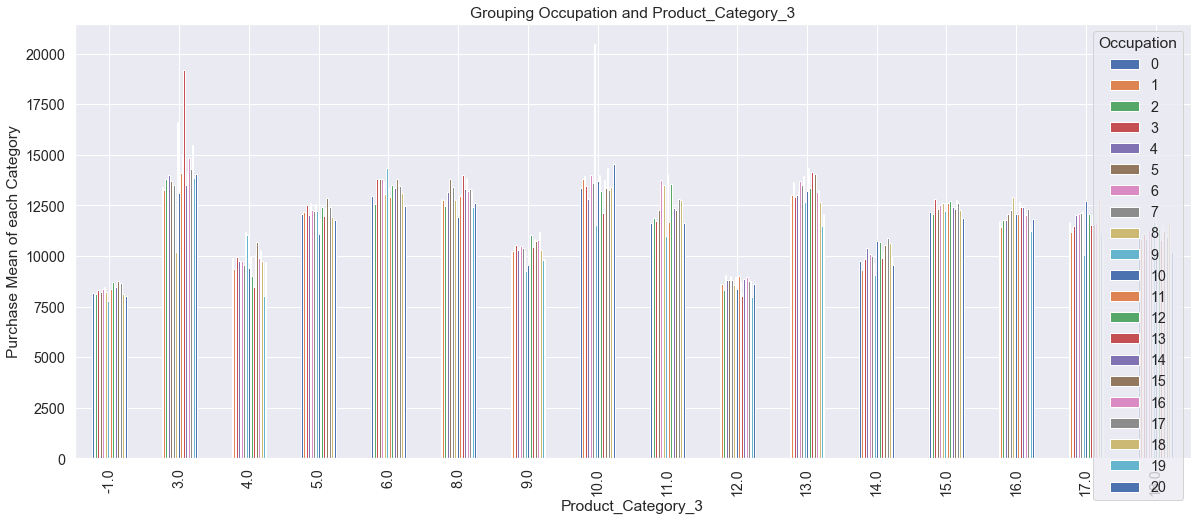

In [34]:
#Created a pivot table chart to represent the mean purchase of each product labelled in 
#'Product_Category_3' w.r.t 'Occupation' for a better understanding of Occupation preferences on product categories'
pd.pivot_table(data_train, values = 'Purchase', index = 'Product_Category_3',
               columns = 'Occupation',aggfunc ='mean').plot.bar(figsize=(20,8))
plt.xlabel("Product_Category_3")
plt.ylabel("Purchase Mean of each Category")
plt.title("Grouping Occupation and Product_Category_3")

In [35]:
#Unique values in feature 'Product_Category_3'

In [36]:
data_train['Product_Category_3'].unique()

array([-1., 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [37]:
#FROM THE ABOVE 3 GRAPH SHOWN, WE CAN SEE A SIMILAR KIND OF PATTERN (UPS-DOWN) W.R.T 'Product_Category_3',
#So a proper mapping can be provided to the labelled values in 'Product_Category_3'

#binning of product_category_3 [Training Set]
data_train['Product_Category_3'] = data_train['Product_Category_3'].map({-1.:1, 14.:2, 17.:2,  5.:3,  4.:2, 16.:2, 15.:3,  
                                                             8.:3,  9.:2, 13.:3,  6.:3, 12.:1,  3.:3, 18.:2, 11.:3, 10.:3})

C:\Users\ankit.banerjee\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [38]:
#binning of product_category_3 [Validation Set]
data_test['Product_Category_3'] = data_test['Product_Category_3'].map({-1.:1, 14.:2, 17.:2,  5.:3,  4.:2, 16.:2, 15.:3,  
                                                             8.:3,  9.:2, 13.:3,  6.:3, 12.:1,  3.:3, 18.:2, 11.:3, 10.:3})

C:\Users\ankit.banerjee\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [39]:
#binning of product_category_3 [Test Set]
test['Product_Category_3'] = test['Product_Category_3'].map({-1.:1, 14.:2, 17.:2,  5.:3,  4.:2, 16.:2, 15.:3,  
                                                     8.:3,  9.:2, 13.:3,  6.:3, 12.:1,  3.:3, 18.:2, 11.:3, 10.:3})

# Following 4 graph form similar pattern (used for binning 'Product_Category_2')

Text(0.5, 1.0, 'Grouping Gender and Product_Category_2')

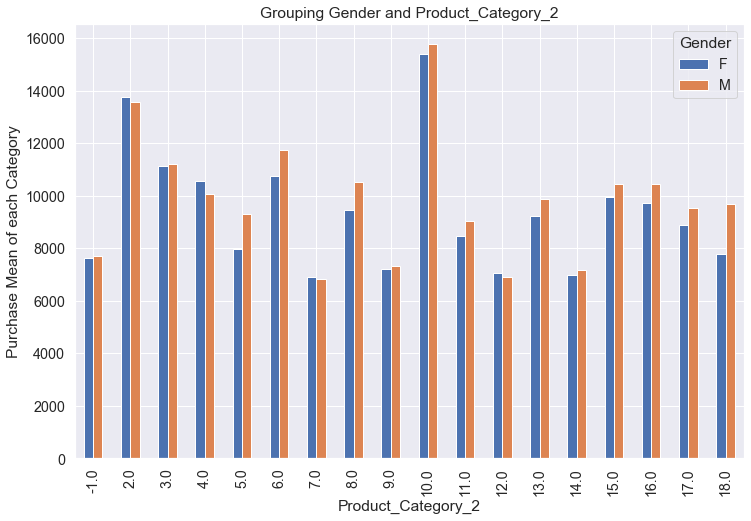

In [40]:
#Created a pivot table chart to represent the mean purchase of each product labelled in 
#'Product_Category_2' w.r.t 'Gender' for a better understanding of Gender preferences on product categories'
pd.pivot_table(data_train, values = 'Purchase', index = 'Product_Category_2',
               columns = 'Gender',aggfunc ='mean').plot.bar(figsize=(12,8))
plt.xlabel("Product_Category_2")
plt.ylabel("Purchase Mean of each Category")
plt.title("Grouping Gender and Product_Category_2")

Text(0.5, 1.0, 'Grouping Age and Product_Category_2')

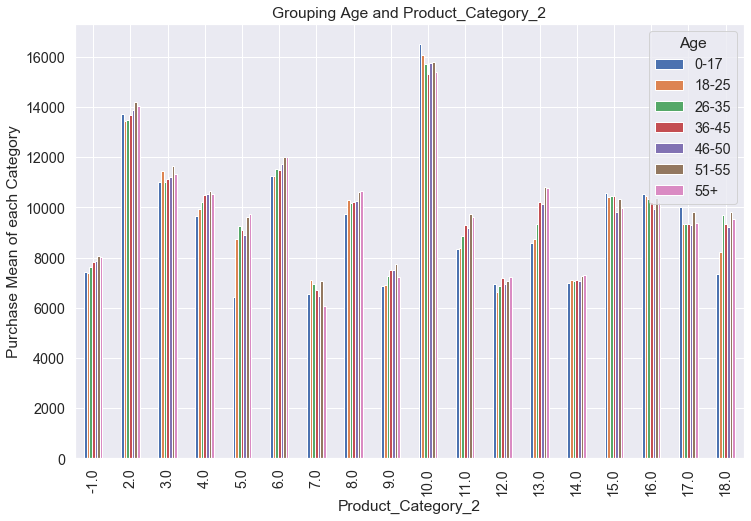

In [41]:
#Created a pivot table chart to represent the mean purchase of each product labelled in 
#'Product_Category_2' w.r.t 'Age' for a better understanding of Age group preferences on product categories'
pd.pivot_table(data_train, values = 'Purchase', index = 'Product_Category_2',
               columns = 'Age',aggfunc ='mean').plot.bar(figsize=(12,8))
plt.xlabel("Product_Category_2")
plt.ylabel("Purchase Mean of each Category")
plt.title("Grouping Age and Product_Category_2")

Text(0.5, 1.0, 'Grouping Occupation and Product_Category_2')

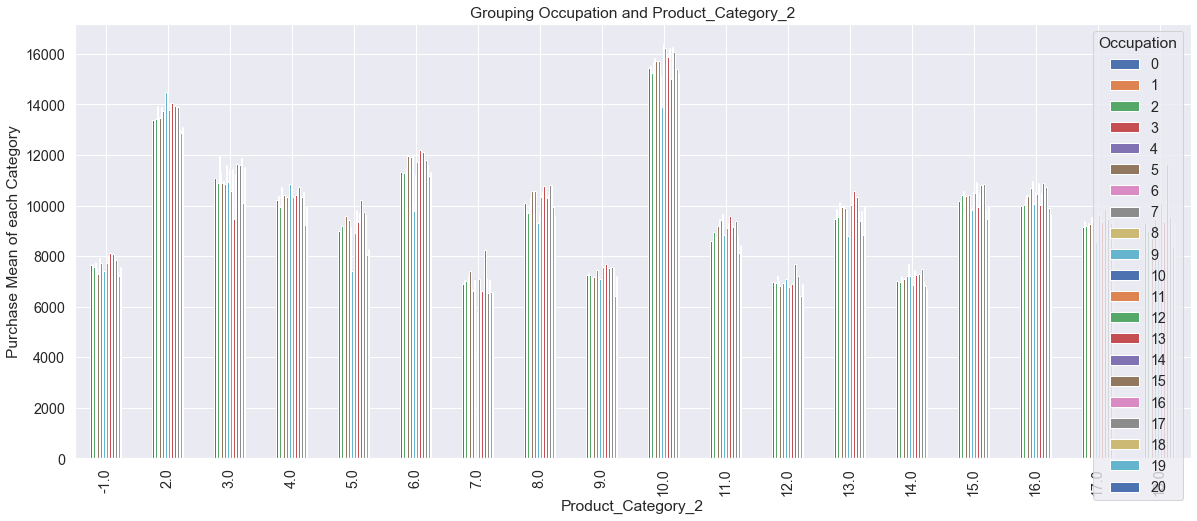

In [42]:
#Created a pivot table chart to represent the mean purchase of each product labelled in 
#'Product_Category_2' w.r.t 'Occupation' for a better understanding of Occupation preferences on product categories'
pd.pivot_table(data_train, values = 'Purchase', index = 'Product_Category_2',
               columns = 'Occupation',aggfunc ='mean').plot.bar(figsize=(20,8))
plt.xlabel("Product_Category_2")
plt.ylabel("Purchase Mean of each Category")
plt.title("Grouping Occupation and Product_Category_2")

Text(0.5, 1.0, 'Grouping Marital_Status and Product_Category_2')

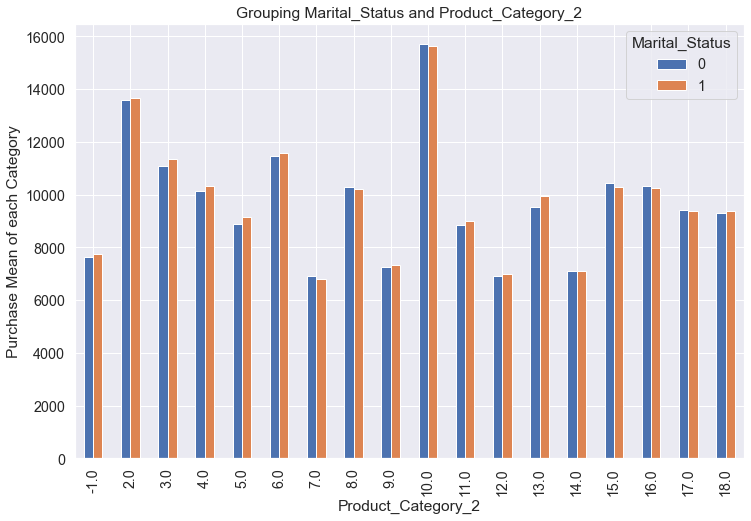

In [43]:
#Created a pivot table chart to represent the mean purchase of each product labelled in 
#'Product_Category_2' w.r.t 'Marital_Status' for a better understanding of Marital_Status preferences on product categories'
pd.pivot_table(data_train, values = 'Purchase', index = 'Product_Category_2',
               columns = 'Marital_Status',aggfunc ='mean').plot.bar(figsize=(12,8))
plt.xlabel("Product_Category_2")
plt.ylabel("Purchase Mean of each Category")
plt.title("Grouping Marital_Status and Product_Category_2")

In [44]:
#Unique values in feature 'Product_Category_2'

In [45]:
data_train['Product_Category_2'].unique()

array([-1.,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [46]:
#FROM THE ABOVE 4 GRAPH SHOWN, WE CAN SEE A SIMILAR KIND OF PATTERN (UPS-DOWNS) W.R.T 'Product_Category_2',
#So a proper mapping can be provided to the labelled values in 'Product_Category_2'

#binning of product_category_2 [Training Set]
data_train['Product_Category_2'] = data_train['Product_Category_2'].map({-1.:1,  6.:2, 14.:1,  4.:2,  2.:3,  8.:2,  5.:2, 
                                                16.:2, 15.:2, 11.:2, 13.:2,  3.:2, 17.:2,9.:1, 12.:1, 10.:3, 18.:2,  7.:1})

C:\Users\ankit.banerjee\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [47]:
#binning of product_category_2 [Validation Set]
data_test['Product_Category_2'] = data_test['Product_Category_2'].map({-1.:1,  6.:2, 14.:1,  4.:2,  2.:3,  8.:2,  5.:2, 
                                                16.:2, 15.:2, 11.:2, 13.:2,  3.:2, 17.:2,9.:1, 12.:1, 10.:3, 18.:2,  7.:1})

C:\Users\ankit.banerjee\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [48]:
#binning of product_category_2 [Test Set]
test['Product_Category_2'] = test['Product_Category_2'].map({-1.:1,  6.:2, 14.:1,  4.:2,  2.:3,  8.:2,  5.:2, 
                                                16.:2, 15.:2, 11.:2, 13.:2,  3.:2, 17.:2,9.:1, 12.:1, 10.:3, 18.:2,  7.:1})

In [49]:
data_train['Purchase'].corr(data_train['Product_Category_2'])

0.37460733500474785

# Following 4 graph form similar pattern (used for binning 'Product_Category_1')

Text(0.5, 1.0, 'Grouping Gender and Product_Category_1')

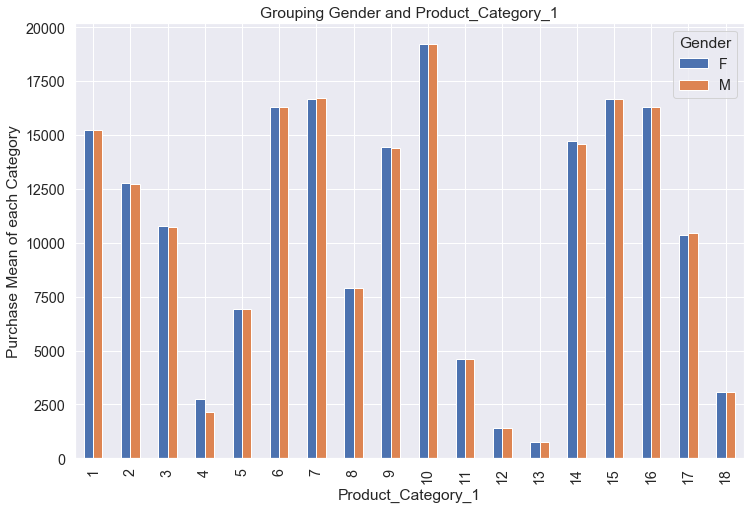

In [50]:
#Created a pivot table chart to represent the mean purchase of each product labelled in 
#'Product_Category_1' w.r.t 'Gender' for a better understanding of Gender preferences on product categories'
pd.pivot_table(data_train, values = 'Purchase', index = 'Product_Category_1',
               columns = 'Gender',aggfunc ='median').plot.bar(figsize=(12,8))
plt.xlabel("Product_Category_1")
plt.ylabel("Purchase Mean of each Category")
plt.title("Grouping Gender and Product_Category_1")

Text(0.5, 1.0, 'Grouping Age and Product_Category_1')

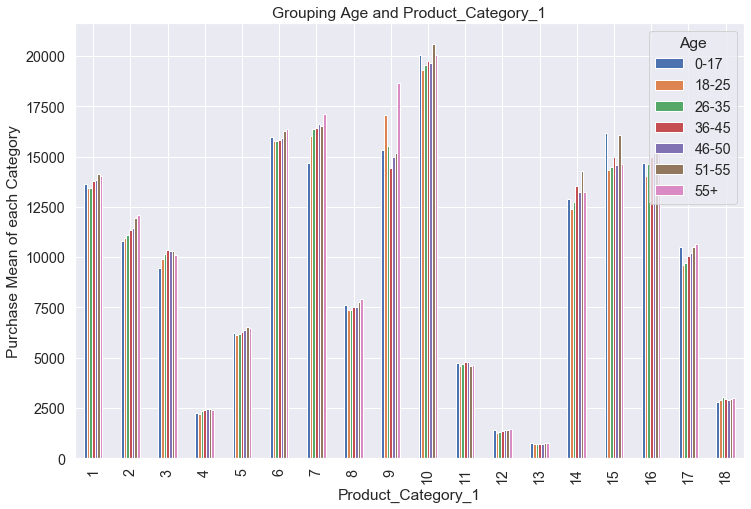

In [51]:
#Created a pivot table chart to represent the mean purchase of each product labelled in 
#'Product_Category_1' w.r.t 'Age' for a better understanding of Age preferences on product categories
pd.pivot_table(data_train, values = 'Purchase', index = 'Product_Category_1',
               columns = 'Age',aggfunc ='mean').plot.bar(figsize=(12,8))
plt.xlabel("Product_Category_1")
plt.ylabel("Purchase Mean of each Category")
plt.title("Grouping Age and Product_Category_1")

Text(0.5, 1.0, 'Grouping Occupation and Product_Category_1')

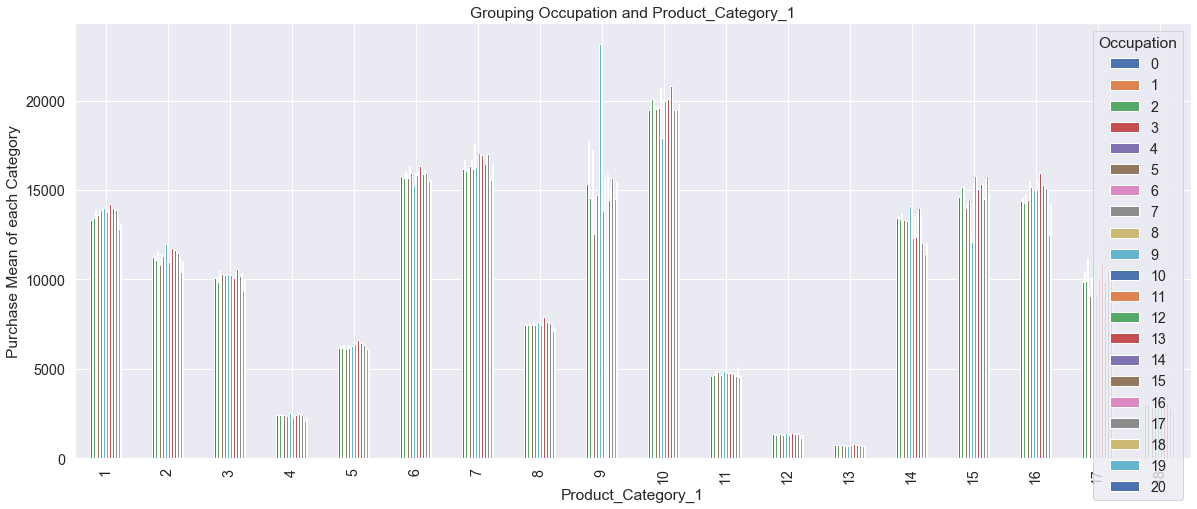

In [52]:
#Created a pivot table chart to represent the mean purchase of each product labelled in 
#'Product_Category_1' w.r.t 'Occupation' for a better understanding of Occupation preferences on product categories'
pd.pivot_table(data_train, values = 'Purchase', index = 'Product_Category_1',
               columns = 'Occupation',aggfunc ='mean').plot.bar(figsize=(20,8))
plt.xlabel("Product_Category_1")
plt.ylabel("Purchase Mean of each Category")
plt.title("Grouping Occupation and Product_Category_1")

Text(0.5, 1.0, 'Grouping Marital_Status and Product_Category_1')

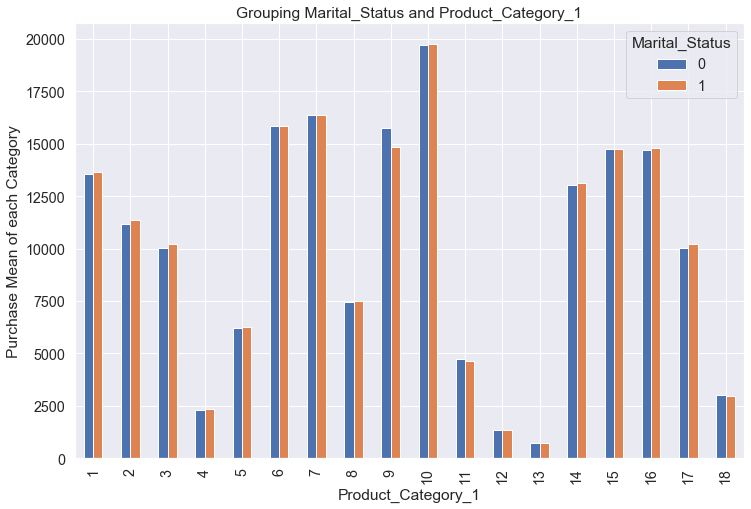

In [53]:
#Created a pivot table chart to represent the mean purchase of each product labelled in 
#'Product_Category_1' w.r.t 'Marital_Status' for a better understanding of Marital_Status preferences on product categories
pd.pivot_table(data_train, values = 'Purchase', index = 'Product_Category_1',
               columns = 'Marital_Status',aggfunc ='mean').plot.bar(figsize=(12,8))
plt.xlabel("Product_Category_1")
plt.ylabel("Purchase Mean of each Category")
plt.title("Grouping Marital_Status and Product_Category_1")

In [54]:
#Unique values in feature 'Product_Category_1'

In [55]:
data_train['Product_Category_1'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9], dtype=int64)

In [56]:
#FROM THE ABOVE 4 GRAPH SHOWN, WE CAN SEE A SIMILAR KIND OF PATTERN (UPS-DOWNS) W.R.T 'Product_Category_1',
#So a proper mapping can be provided to the labelled values in 'Product_Category_1'

#binning of product_category_1 [Training Set]
data_train['Product_Category_1'] = data_train['Product_Category_1'].map({3:3,  1:3, 12:1,  2:3,  8:2,  5:2,  4:1, 16:4, 
                                                                11:1, 14:3,  6:4, 15:3, 13:1,  9:3,  7:4, 10:4, 18:1,17:3})

C:\Users\ankit.banerjee\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [57]:
#binning of product_category_1 [Validation Set]
data_test['Product_Category_1'] = data_test['Product_Category_1'].map({3:3,  1:3, 12:1,  2:3,  8:2,  5:2,  4:1, 16:4, 
                                                                11:1, 14:3,  6:4, 15:3, 13:1,  9:3,  7:4, 10:4, 18:1,17:3})

C:\Users\ankit.banerjee\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [58]:
#binning of product_category_1 [Test Set]
test['Product_Category_1'] = test['Product_Category_1'].map({3:3,  1:3, 12:1,  2:3,  8:2,  5:2,  4:1, 16:4, 
                                                                11:1, 14:3,  6:4, 15:3, 13:1,  9:3,  7:4, 10:4, 18:1,17:3})

In [59]:
data_train['Purchase'].corr(data_train['Product_Category_1'])

0.7502774713817845

In [60]:
#Calculating the mean of Purchase done in Each City 
#to get an estimate of the Purchase variation.

Text(0, 0.5, 'Mean of purchase in each city')

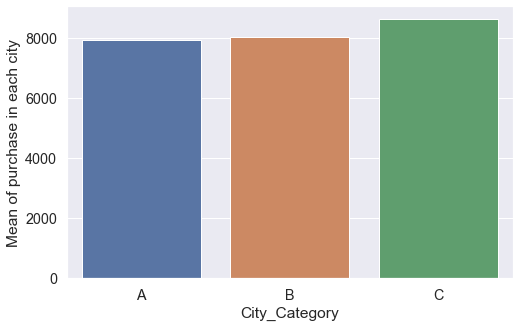

In [61]:
df2 = data_train.groupby('City_Category').Purchase.median().to_frame()
df2.reset_index(inplace=True)
f, ax = plt.subplots(figsize=(8,5))
sns.barplot(x='City_Category', y='Purchase', data=df2);
plt.ylabel("Mean of purchase in each city")

In [62]:
#Grouping cityCategory and Gender to find the mean of the purchase
#to estimate whether Gender preference has any effect on Purchase amount.

Text(0.5, 1.0, 'Grouping Gender and City_Category')

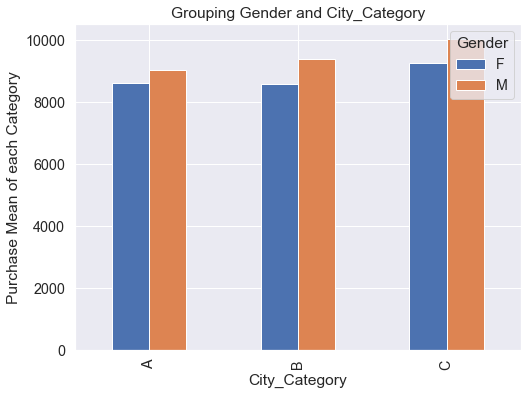

In [63]:
pd.pivot_table(data_train, values = 'Purchase', index = 'City_Category',
               columns = 'Gender',aggfunc ='mean').plot.bar(figsize=(8,6))
plt.xlabel("City_Category")
plt.ylabel("Purchase Mean of each Category")
plt.title("Grouping Gender and City_Category")

In [64]:
#Plotting Occupation wise purchase to check if
#specific occupation tends to spike purchase amounts

Text(0.5, 1, 'Grouping Purchase and Occupation')

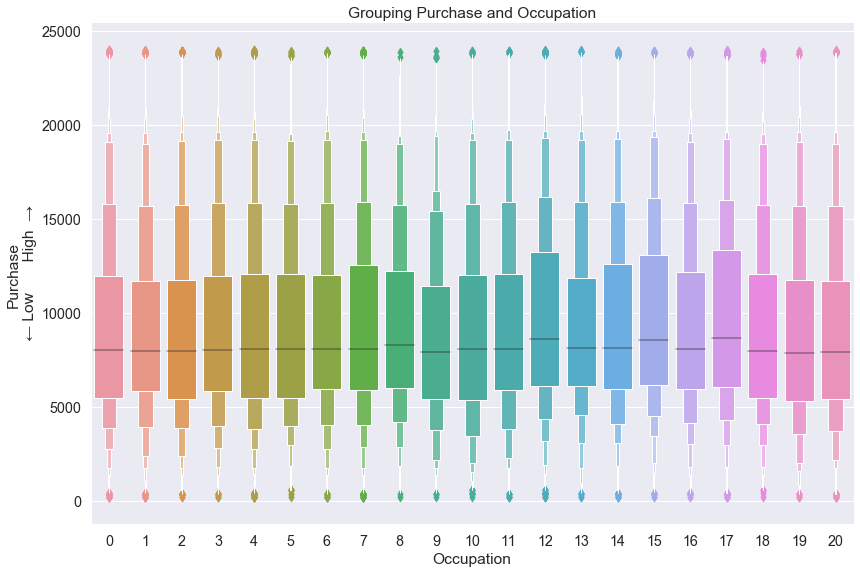

In [65]:
g = sns.catplot(x='Occupation', y='Purchase', data=data_train,height=8,aspect=1.5,kind='boxen')
g.set(xlabel = 'Occupation', ylabel = 'Purchase\n ← Low       High  →')
plt.title("Grouping Purchase and Occupation")

In [66]:
#Grouping cityCategory and Product_Category_1 
#and plotting the mean of the purchase as value
#to check if the products are available in each city category or not 
#and also the customer inclination towards the product in each city (Effect of Branding/Marketing in each City)

Text(0.5, 1.0, 'Grouping Product_Category_1 and City_Category')

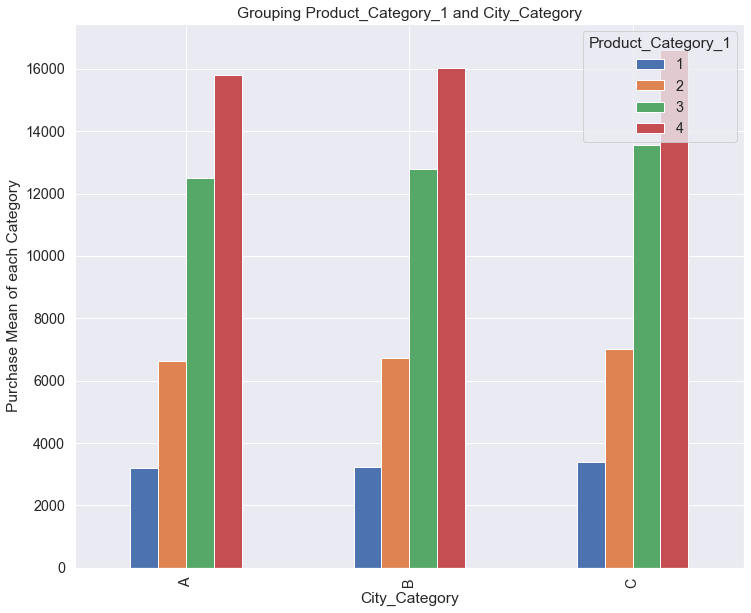

In [67]:
df3 = pd.pivot_table(data_train, values = 'Purchase', index = 'City_Category',
               columns = 'Product_Category_1',aggfunc ='mean')
df3.plot.bar(figsize=(12,10))
plt.xlabel("City_Category")
plt.ylabel("Purchase Mean of each Category")
plt.title("Grouping Product_Category_1 and City_Category")

In [68]:
#Grouping cityCategory and Product_Category_2 
#and plotting the mean of the purchase as value
#to check if the products are available in each city category or not 
#and also the customer inclination towards the product (Effect of Branding/Marketing in each City)

Text(0.5, 1.0, 'Grouping City_Category and Product_Category_2')

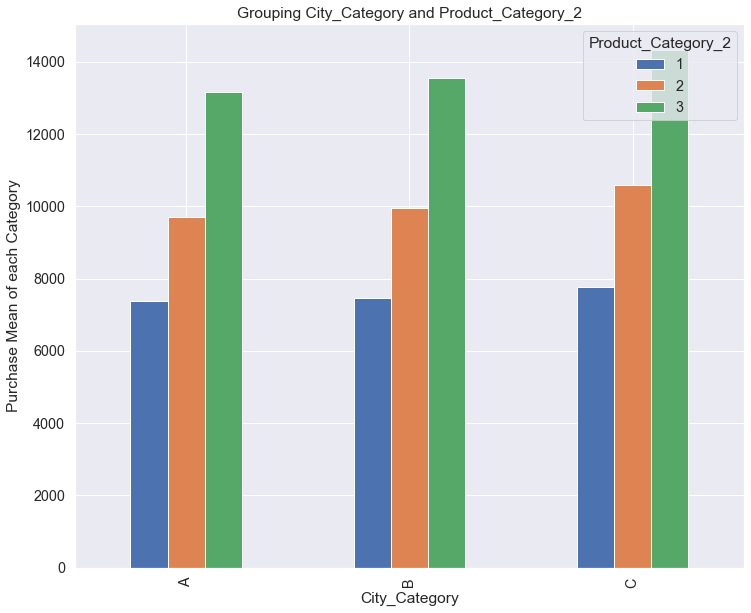

In [69]:
df4 = pd.pivot_table(data_train, values = 'Purchase', index = 'City_Category',
               columns = 'Product_Category_2',aggfunc ='mean')
df4.plot.bar(figsize=(12,10))
plt.xlabel("City_Category")
plt.ylabel("Purchase Mean of each Category")
plt.title("Grouping City_Category and Product_Category_2")

In [70]:
#Grouping cityCategory and Product_Category_3 
#and plotting the mean of the purchase as value
#to check if the products are available in each city category or not 
#and also the customer inclination towards the product(Effect of Branding/Marketing in each City)

Text(0.5, 1.0, 'Grouping City_Category and Product_Category_3')

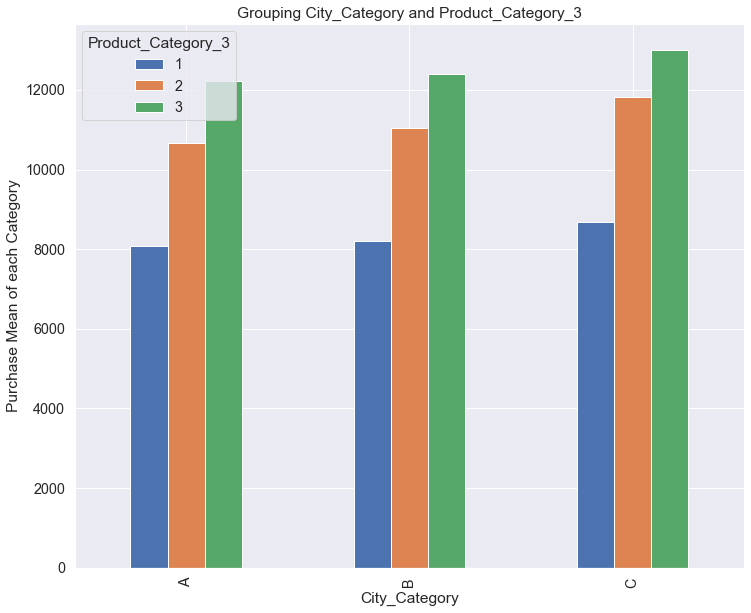

In [71]:
df5 = pd.pivot_table(data_train, values = 'Purchase', index = 'City_Category',
               columns = 'Product_Category_3',aggfunc ='mean')
df5.plot.bar(figsize=(12,10))
plt.xlabel("City_Category")
plt.ylabel("Purchase Mean of each Category")
plt.title("Grouping City_Category and Product_Category_3")

In [72]:
#Plotting Gender-Purchase graph to show
#the range in which a particular gender
#has the need/requirement to purchase.
#Basically we are estimating the density of purchase range of each Gender

Text(0.5, 1, 'Grouping Gender and Purchase')

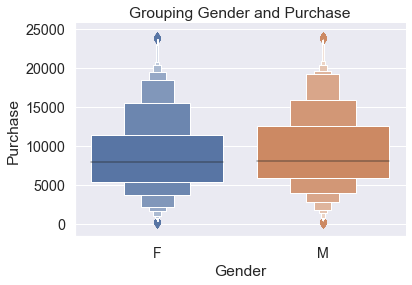

In [73]:
sns.catplot(x='Gender', y='Purchase', 
            data=data_train,
            kind='boxen',
            height=4, aspect=1.5)
plt.title("Grouping Gender and Purchase")

In [74]:
#Grouping cityCategory and Gender to find the Median of the purchase
#to check if married/unmarried people have any specific prefence upon
#purchase

Text(0.5, 1.0, 'Grouping Occupation and Marital_Status')

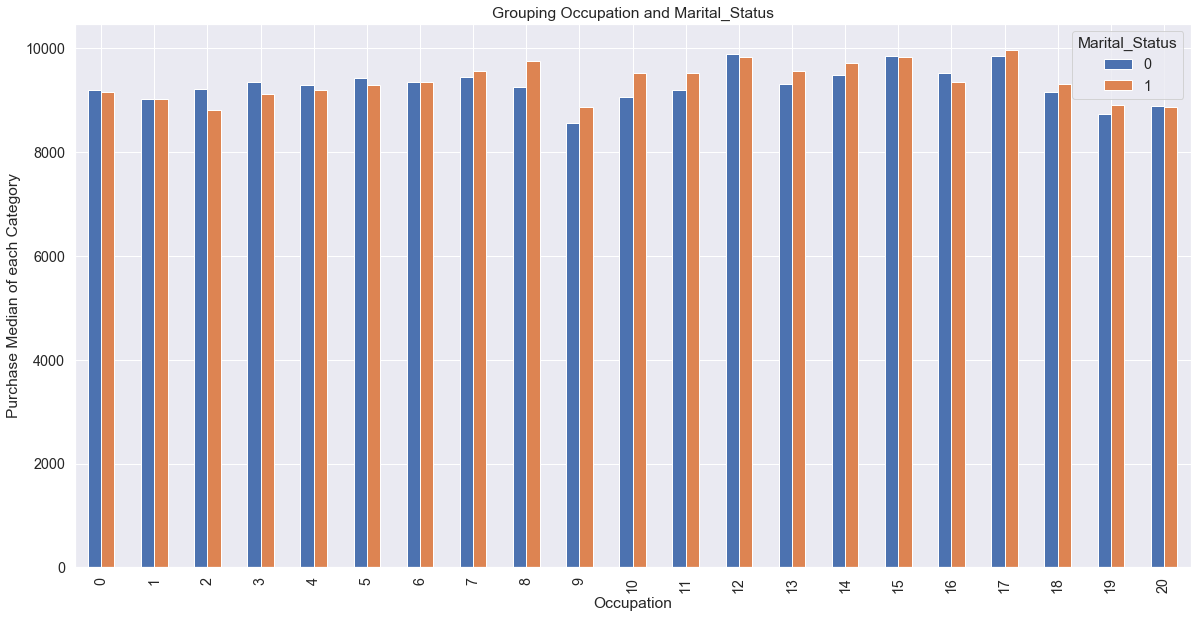

In [75]:
pd.pivot_table(data_train, values = 'Purchase', index = 'Occupation',
               columns = 'Marital_Status',aggfunc ='mean').plot.bar(figsize=(20,10))
plt.xlabel("Occupation")
plt.ylabel("Purchase Median of each Category")
plt.title("Grouping Occupation and Marital_Status")

In [76]:
#plotting the duration of a person staying in city vs purchase count
#to check if the duration tends to change the preference of purchase
#Basically checking the long term/short term product priorities

Text(0.5, 1.0, 'Mean of purchase within the stay duration of the person')

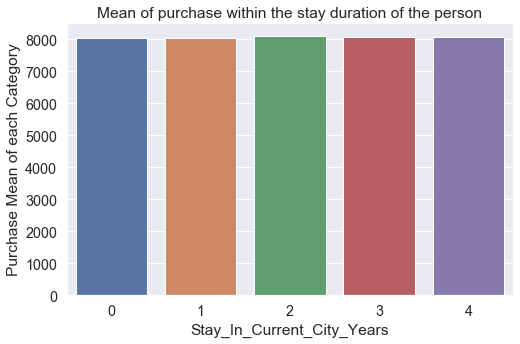

In [77]:
df2 = data_train.groupby('Stay_In_Current_City_Years').Purchase.median().to_frame()
df2.reset_index(inplace=True)
f, ax = plt.subplots(figsize=(8,5))
sns.barplot(x='Stay_In_Current_City_Years', y='Purchase', data=df2);
plt.xlabel("Stay_In_Current_City_Years")
plt.ylabel("Purchase Mean of each Category")
plt.title("Mean of purchase within the stay duration of the person")

In [78]:
#Grouping Occupation and Gender and plotting the mean of the purchase
#to check if gender with a particular occupation tends to purchase more/less

Text(0.5, 1.0, 'Grouping Occupation and Gender')

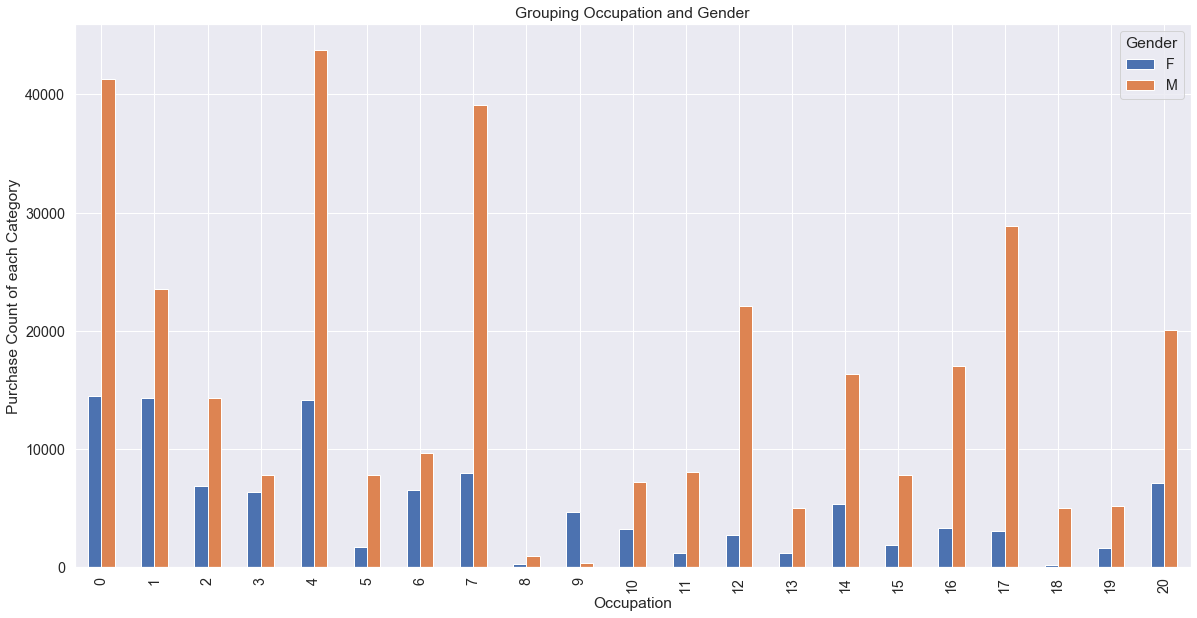

In [79]:
pd.pivot_table(data_train, values = 'Purchase', index = 'Occupation',
               columns = 'Gender',aggfunc ='count').plot.bar(figsize=(20,10))
plt.xlabel("Occupation")
plt.ylabel("Purchase Count of each Category")
plt.title("Grouping Occupation and Gender")

Text(0.5, 1.0, 'Plot of Marital_Status')

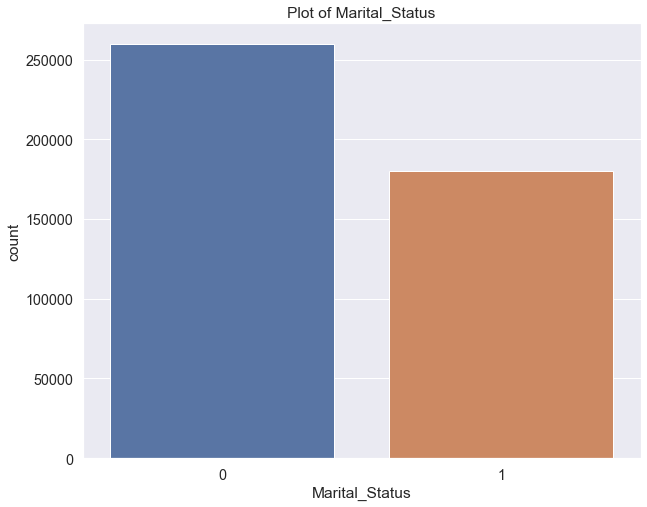

In [80]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
sns.countplot(data_train.Marital_Status)
plt.title("Plot of Marital_Status")

Text(0.5, 1.0, 'Plot of Gender')

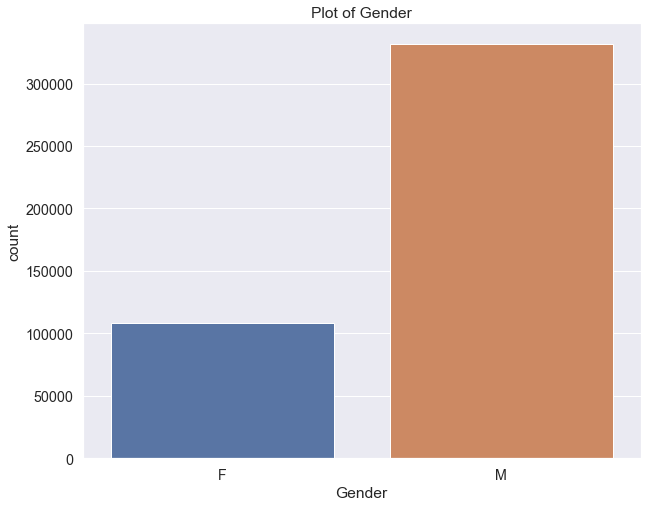

In [81]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
sns.countplot(data_train.Gender)
plt.title("Plot of Gender")

Text(0.5, 1.0, 'Plot of Age Group')

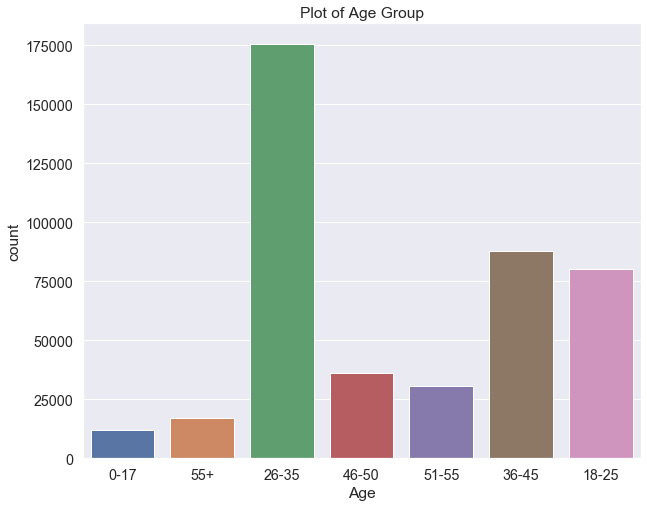

In [82]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
sns.countplot(data_train.Age)
plt.title("Plot of Age Group")

# Feature Engineering

__HYPOTHESIS:__ <br>
_This feature is created to show if one of the gender with particular occupation buys expensive/cheap products._

In [83]:
#training set
#Gender , Occupation
res = data_train.groupby(['Gender', 'Occupation'], as_index=False)['Purchase'].mean()
data_train = pd.merge(data_train,res,on=['Gender', 'Occupation'], how='inner')
data_train.rename(columns = {'Purchase_x':'Purchase', 'Purchase_y':'Gen_Occ_Mean', }, inplace = True) 
data_train.head()

#validation set
data_test = pd.merge(data_test,res,on=['Gender', 'Occupation'], how='inner')
data_test.rename(columns = {'Purchase_x':'Purchase', 'Purchase_y':'Gen_Occ_Mean', }, inplace = True) 
data_test.head()

#Test set
test = pd.merge(test,res,on=['Gender', 'Occupation'], how='inner')
test.rename(columns = {'Purchase_x':'Purchase', 'Purchase_y':'Gen_Occ_Mean', }, inplace = True) 
test.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,M,46-50,7,B,2,1,3,2,1,9557.852231
1,M,26-35,7,A,1,0,4,2,2,9557.852231
2,M,26-35,7,B,2,1,3,3,3,9557.852231
3,M,26-35,7,B,2,1,2,1,1,9557.852231
4,M,26-35,7,B,2,1,2,2,2,9557.852231


__HYPOTHESIS:__ <br>
_This feature is created to show if one of the gender's stay duration in a city showcases any purchase variation.<br>
It is helpful to see the long term/Short term product priorities._

In [84]:
#training set
#Gender , Occupation
res = data_train.groupby(['Gender', 'Stay_In_Current_City_Years'], as_index=False)['Purchase'].mean()
data_train = pd.merge(data_train,res,on=['Gender', 'Stay_In_Current_City_Years'], how='inner')
data_train.rename(columns = {'Purchase_x':'Purchase', 'Purchase_y':'Gen_StayDur_Mean', }, inplace = True) 
data_train.head()

#validation set
data_test = pd.merge(data_test,res,on=['Gender', 'Stay_In_Current_City_Years'], how='inner')
data_test.rename(columns = {'Purchase_x':'Purchase', 'Purchase_y':'Gen_StayDur_Mean', }, inplace = True) 
data_test.head()

#Test set
test = pd.merge(test,res,on=['Gender', 'Stay_In_Current_City_Years'], how='inner')
test.rename(columns = {'Purchase_x':'Purchase', 'Purchase_y':'Gen_StayDur_Mean', }, inplace = True) 

__HYPOTHESIS:__ <br>
_This feature is created to show if one of the gender's marital status showcases any purchase variation.<br>
It is helpful to see if the Marital_staus changes the preferences of product purchase i.e they might purchase for their families too._

In [85]:
#training set
#Gender , Marital_Status
res = data_train.groupby(['Gender', 'Marital_Status'], as_index=False)['Purchase'].mean()
data_train = pd.merge(data_train,res,on=['Gender', 'Marital_Status'], how='inner')
data_train.rename(columns = {'Purchase_x':'Purchase', 'Purchase_y':'Gen_MarSts_Mean', }, inplace = True) 
data_train.head()

#validation set
data_test = pd.merge(data_test,res,on=['Gender', 'Marital_Status'], how='inner')
data_test.rename(columns = {'Purchase_x':'Purchase', 'Purchase_y':'Gen_MarSts_Mean', }, inplace = True) 
data_test.head()

#Test set
test = pd.merge(test,res,on=['Gender', 'Marital_Status'], how='inner')
test.rename(columns = {'Purchase_x':'Purchase', 'Purchase_y':'Gen_MarSts_Mean', }, inplace = True) 


__HYPOTHESIS:__ <br>
_This feature is created to show if married/unmarried age groups show any inclination towards purchase variation._

In [86]:
#training set
#Age , Marital_Status
res = data_train.groupby(['Age', 'Marital_Status'], as_index=False)['Purchase'].mean()
data_train = pd.merge(data_train,res,on=['Age', 'Marital_Status'], how='inner')
data_train.rename(columns = {'Purchase_x':'Purchase', 'Purchase_y':'Age_MarSts_Mean', }, inplace = True) 

#validation set
data_test = pd.merge(data_test,res,on=['Age', 'Marital_Status'], how='inner')
data_test.rename(columns = {'Purchase_x':'Purchase', 'Purchase_y':'Age_MarSts_Mean', }, inplace = True) 
data_test.head()

#Test set
test = pd.merge(test,res,on=['Age', 'Marital_Status'], how='inner')
test.rename(columns = {'Purchase_x':'Purchase', 'Purchase_y':'Age_MarSts_Mean', }, inplace = True) 


__HYPOTHESIS:__ <br>
_This feature is created to show the branding/marketing trends and changing trends of products w.r.t the duration.<br>
It is helpful to if see the availability and high/low priority of the product._

In [87]:
#training set
#Stay_In_Current_City_Years , City_Category
res = data_train.groupby(['Stay_In_Current_City_Years', 'City_Category'], as_index=False)['Purchase'].mean()
data_train = pd.merge(data_train,res,on=['Stay_In_Current_City_Years', 'City_Category'], how='inner')
data_train.rename(columns = {'Purchase_x':'Purchase', 'Purchase_y':'StayDur_CityCat_Mean', }, inplace = True) 
data_train.head()

#validation set
data_test = pd.merge(data_test,res,on=['Stay_In_Current_City_Years', 'City_Category'], how='inner')
data_test.rename(columns = {'Purchase_x':'Purchase', 'Purchase_y':'StayDur_CityCat_Mean', }, inplace = True) 
data_test.head()

#Test set
test = pd.merge(test,res,on=['Stay_In_Current_City_Years', 'City_Category'], how='inner')
test.rename(columns = {'Purchase_x':'Purchase', 'Purchase_y':'StayDur_CityCat_Mean', }, inplace = True) 

__HYPOTHESIS:__ <br>
_This feature is created to show if a person's occupation  showcases any purchase variation._

In [88]:
#NEW COLUMN
#mean encoding of Occupation and target value -> purchase 
Mean_encoded_subject = data_train.groupby(['Occupation'])['Purchase'].mean() 
data_train['Occ_Pur_mean'] =  data_train['Occupation'].map(Mean_encoded_subject)

#Adding the same column in validation set
data_test['Occ_Pur_mean'] =  data_test['Occupation'].map(Mean_encoded_subject)
data_test.head()

#Adding the same column in Test set
test['Occ_Pur_mean'] =  test['Occupation'].map(Mean_encoded_subject)

__HYPOTHESIS:__ <br>
_This feature is created to show if one a age group with a particular occupation showcases any inclination towards product purchase variation.<br>
Grouping Age with Occupation because diffrent age group might follow different market product trends._

In [89]:
#Train Set
res = data_train.groupby(['Age', 'Occupation'], as_index=False)['Purchase'].mean()
data_train = pd.merge(data_train,res,on=['Age','Occupation'], how='inner')
data_train.rename(columns = {'Purchase_x':'Purchase', 'Purchase_y':'Age_Occ_Pur_Mean', }, inplace = True) 

#Validation Set
data_test = pd.merge(data_test,res,on=['Age','Occupation'], how='inner')
data_test.rename(columns = {'Purchase_x':'Purchase', 'Purchase_y':'Age_Occ_Pur_Mean', }, inplace = True) 
data_test.head()

#Test Set
test = pd.merge(test,res,on=['Age','Occupation'], how='inner')
test.rename(columns = {'Purchase_x':'Purchase', 'Purchase_y':'Age_Occ_Pur_Mean', }, inplace = True) 

__HYPOTHESIS:__ <br>
_This feature is created to show if one of the gender's age showcases any purchase variation.<br>
Generally different Age group with different sex tend to follow different products._

In [90]:
#In training set
res = data_train.groupby(['Age', 'Gender'], as_index=False)['Purchase'].mean()
data_train = pd.merge(data_train,res,on=['Age','Gender'], how='inner')
data_train.rename(columns = {'Purchase_x':'Purchase', 'Purchase_y':'Age_Gen_Pur_Mean', }, inplace = True) 

#In validation set
data_test = pd.merge(data_test,res,on=['Age','Gender'], how='inner')
data_test.rename(columns = {'Purchase_x':'Purchase', 'Purchase_y':'Age_Gen_Pur_Mean', }, inplace = True) 
data_test.head()

#In Test set
test = pd.merge(test,res,on=['Age','Gender'], how='inner')
test.rename(columns = {'Purchase_x':'Purchase', 'Purchase_y':'Age_Gen_Pur_Mean', }, inplace = True) 

__HYPOTHESIS:__ <br>
<i>This feature is created to show if a person buys a product w.r.t other product.</i><br>
<b>For Example:</b> <i>A person might buy a brush along with toothpaste. As brush and toothpaste are different product categories.</i>

In [91]:
#In training set
res = data_train.groupby(['Product_Category_1', 'Product_Category_2', 'Product_Category_3'], as_index=False)['Purchase'].mean()
data_train = pd.merge(data_train,res,on=['Product_Category_1', 'Product_Category_2', 'Product_Category_3'], how='inner')
data_train.rename(columns = {'Purchase_x':'Purchase', 'Purchase_y':'PD1_PD2_PD3_Pur_Mean', }, inplace = True) 

#Validation Set
data_test = pd.merge(data_test,res,on=['Product_Category_1', 'Product_Category_2', 'Product_Category_3'], how='inner')
data_test.rename(columns = {'Purchase_x':'Purchase', 'Purchase_y':'PD1_PD2_PD3_Pur_Mean', }, inplace = True) 
data_test.head()

#Test Set
test = pd.merge(test,res,on=['Product_Category_1', 'Product_Category_2', 'Product_Category_3'], how='inner')
test.rename(columns = {'Purchase_x':'Purchase', 'Purchase_y':'PD1_PD2_PD3_Pur_Mean', }, inplace = True) 
test.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gen_StayDur_Mean,Gen_MarSts_Mean,Age_MarSts_Mean,StayDur_CityCat_Mean,Occ_Pur_mean,Age_Occ_Pur_Mean,Age_Gen_Pur_Mean,PD1_PD2_PD3_Pur_Mean
0,M,46-50,7,B,2,1,3,2,1,9557.852231,9574.14668,9482.398478,9378.051753,9252.700987,9490.971148,9683.168865,9434.26618,12421.082308
1,M,46-50,7,B,2,1,3,2,1,9557.852231,9574.14668,9482.398478,9378.051753,9252.700987,9490.971148,9683.168865,9434.26618,12421.082308
2,M,46-50,7,B,2,1,3,2,1,9557.852231,9574.14668,9482.398478,9378.051753,9252.700987,9490.971148,9683.168865,9434.26618,12421.082308
3,M,46-50,7,B,2,1,3,2,1,9557.852231,9574.14668,9482.398478,9378.051753,9252.700987,9490.971148,9683.168865,9434.26618,12421.082308
4,M,46-50,7,B,2,1,3,2,1,9557.852231,9574.14668,9482.398478,9378.051753,9252.700987,9490.971148,9683.168865,9434.26618,12421.082308


__HYPOTHESIS:__ <br>
<i>This feature is created to show if a high/low represented occupation purchase have any price variation on product every year.</i><br>


In [92]:
#training set
#Occupation , Stay_In_Current_City_Years
res = data_train.groupby(['Occupation', 'Stay_In_Current_City_Years'], as_index=False)['Purchase'].mean()
data_train = pd.merge(data_train,res,on=['Occupation', 'Stay_In_Current_City_Years'], how='inner')
data_train.rename(columns = {'Purchase_x':'Purchase', 'Purchase_y':'Occ_StayDur_Pur_Mean', }, inplace = True) 
data_train.head()

#validation set
data_test = pd.merge(data_test,res,on=['Occupation', 'Stay_In_Current_City_Years'], how='inner')
data_test.rename(columns = {'Purchase_x':'Purchase', 'Purchase_y':'Occ_StayDur_Pur_Mean', }, inplace = True) 
data_test.head()

#Test set
test = pd.merge(test,res,on=['Occupation', 'Stay_In_Current_City_Years'], how='inner')
test.rename(columns = {'Purchase_x':'Purchase', 'Purchase_y':'Occ_StayDur_Pur_Mean', }, inplace = True) 
test.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gen_StayDur_Mean,Gen_MarSts_Mean,Age_MarSts_Mean,StayDur_CityCat_Mean,Occ_Pur_mean,Age_Occ_Pur_Mean,Age_Gen_Pur_Mean,PD1_PD2_PD3_Pur_Mean,Occ_StayDur_Pur_Mean
0,M,46-50,7,B,2,1,3,2,1,9557.852231,9574.14668,9482.398478,9378.051753,9252.700987,9490.971148,9683.168865,9434.26618,12421.082308,9440.862137
1,M,46-50,7,B,2,1,3,2,1,9557.852231,9574.14668,9482.398478,9378.051753,9252.700987,9490.971148,9683.168865,9434.26618,12421.082308,9440.862137
2,M,46-50,7,B,2,1,3,2,1,9557.852231,9574.14668,9482.398478,9378.051753,9252.700987,9490.971148,9683.168865,9434.26618,12421.082308,9440.862137
3,M,46-50,7,B,2,1,3,2,1,9557.852231,9574.14668,9482.398478,9378.051753,9252.700987,9490.971148,9683.168865,9434.26618,12421.082308,9440.862137
4,M,46-50,7,B,2,1,3,2,1,9557.852231,9574.14668,9482.398478,9378.051753,9252.700987,9490.971148,9683.168865,9434.26618,12421.082308,9440.862137


__HYPOTHESIS:__ <br>
<i>This feature is created to show if a City has any branding trends for each Age group people</i><br>
<b>For Example:</b> <i>A yound kid might want an Iphone whereas a adult might want to buy products for his/her home.</i>

In [93]:
#training set
#Age , City_Category
res = data_train.groupby(['Age', 'City_Category'], as_index=False)['Purchase'].mean()
data_train = pd.merge(data_train,res,on=['Age', 'City_Category'], how='inner')
data_train.rename(columns = {'Purchase_x':'Purchase', 'Purchase_y':'Age_CityCat_Mean', }, inplace = True) 
data_train.head()

#validation set
data_test = pd.merge(data_test,res,on=['Age', 'City_Category'], how='inner')
data_test.rename(columns = {'Purchase_x':'Purchase', 'Purchase_y':'Age_CityCat_Mean', }, inplace = True) 
data_test.head()

#Test set
test = pd.merge(test,res,on=['Age', 'City_Category'], how='inner')
test.rename(columns = {'Purchase_x':'Purchase', 'Purchase_y':'Age_CityCat_Mean', }, inplace = True) 

# Encoding of Categorical Features

In [94]:
#Label encoding the column 'GENDER'

In [95]:
#in training set
from sklearn.preprocessing import LabelEncoder
data_train['Gender'] = LabelEncoder().fit_transform(data_train.Gender)

#in validation set
data_test['Gender'] = LabelEncoder().fit_transform(data_test.Gender)
data_test

#in Test set
test['Gender'] = LabelEncoder().fit_transform(test.Gender)
test

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gen_StayDur_Mean,Gen_MarSts_Mean,Age_MarSts_Mean,StayDur_CityCat_Mean,Occ_Pur_mean,Age_Occ_Pur_Mean,Age_Gen_Pur_Mean,PD1_PD2_PD3_Pur_Mean,Occ_StayDur_Pur_Mean,Age_CityCat_Mean
0,1,46-50,7,B,2,1,3,2,1,9557.852231,9574.146680,9482.398478,9378.051753,9252.700987,9490.971148,9683.168865,9434.266180,12421.082308,9440.862137,9299.588188
1,1,46-50,7,B,2,1,3,2,1,9557.852231,9574.146680,9482.398478,9378.051753,9252.700987,9490.971148,9683.168865,9434.266180,12421.082308,9440.862137,9299.588188
2,1,46-50,7,B,2,1,3,2,1,9557.852231,9574.146680,9482.398478,9378.051753,9252.700987,9490.971148,9683.168865,9434.266180,12421.082308,9440.862137,9299.588188
3,1,46-50,7,B,2,1,3,2,1,9557.852231,9574.146680,9482.398478,9378.051753,9252.700987,9490.971148,9683.168865,9434.266180,12421.082308,9440.862137,9299.588188
4,1,46-50,7,B,2,1,3,2,1,9557.852231,9574.146680,9482.398478,9378.051753,9252.700987,9490.971148,9683.168865,9434.266180,12421.082308,9440.862137,9299.588188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1,0-17,10,A,3,0,4,3,3,9418.365708,9544.399870,9508.635429,9032.220539,8964.652748,9080.170080,8981.565408,9332.990566,16878.224329,9208.708834,8631.506300
233595,1,0-17,10,A,3,0,1,2,3,9418.365708,9544.399870,9508.635429,9032.220539,8964.652748,9080.170080,8981.565408,9332.990566,2440.090909,9208.708834,8631.506300
233596,0,0-17,10,A,3,0,1,2,3,8331.479237,8758.032098,8746.942937,9032.220539,8964.652748,9080.170080,8981.565408,8439.364326,2440.090909,9208.708834,8631.506300
233597,0,0-17,10,A,3,0,4,1,2,8331.479237,8758.032098,8746.942937,9032.220539,8964.652748,9080.170080,8981.565408,8439.364326,20017.743316,9208.708834,8631.506300


In [96]:
#Label encoding the column 'Age'

In [97]:
#in training set
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(data_train['Age'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
data_train['Age'] = LabelEncoder().fit_transform(data_train.Age)
print(le_name_mapping)

{'0-17': 0, '18-25': 1, '26-35': 2, '36-45': 3, '46-50': 4, '51-55': 5, '55+': 6}


In [98]:
#label endoing age in validation set
data_test['Age'] = LabelEncoder().fit_transform(data_test.Age)
data_test

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,...,Gen_StayDur_Mean,Gen_MarSts_Mean,Age_MarSts_Mean,StayDur_CityCat_Mean,Occ_Pur_mean,Age_Occ_Pur_Mean,Age_Gen_Pur_Mean,PD1_PD2_PD3_Pur_Mean,Occ_StayDur_Pur_Mean,Age_CityCat_Mean
0,1,2,0,B,4,0,3.0,2,3,19509,...,9468.120479,9508.635429,9295.186116,9241.767152,9176.360406,9155.760528,9460.022846,12490.197514,8947.070511,9199.458877
1,1,2,0,B,4,0,3.0,2,3,10755,...,9468.120479,9508.635429,9295.186116,9241.767152,9176.360406,9155.760528,9460.022846,12490.197514,8947.070511,9199.458877
2,1,2,0,B,4,0,3.0,2,3,18978,...,9468.120479,9508.635429,9295.186116,9241.767152,9176.360406,9155.760528,9460.022846,12490.197514,8947.070511,9199.458877
3,1,2,0,B,4,0,3.0,2,3,12762,...,9468.120479,9508.635429,9295.186116,9241.767152,9176.360406,9155.760528,9460.022846,12490.197514,8947.070511,9199.458877
4,1,2,0,B,4,0,3.0,2,3,3682,...,9468.120479,9508.635429,9295.186116,9241.767152,9176.360406,9155.760528,9460.022846,12490.197514,8947.070511,9199.458877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105856,1,0,10,A,3,0,3.0,3,1,19428,...,9544.399870,9508.635429,9032.220539,8964.652748,9080.170080,8981.565408,9332.990566,14312.942397,9208.708834,8631.506300
105857,1,0,10,A,3,0,4.0,1,1,20283,...,9544.399870,9508.635429,9032.220539,8964.652748,9080.170080,8981.565408,9332.990566,15302.436568,9208.708834,8631.506300
105858,1,0,10,A,3,0,4.0,2,2,20287,...,9544.399870,9508.635429,9032.220539,8964.652748,9080.170080,8981.565408,9332.990566,16555.510123,9208.708834,8631.506300
105859,1,0,10,A,3,0,4.0,2,2,23274,...,9544.399870,9508.635429,9032.220539,8964.652748,9080.170080,8981.565408,9332.990566,16555.510123,9208.708834,8631.506300


In [99]:
#label endoing age in Test set
test['Age'] = LabelEncoder().fit_transform(test.Age)
test

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gen_StayDur_Mean,Gen_MarSts_Mean,Age_MarSts_Mean,StayDur_CityCat_Mean,Occ_Pur_mean,Age_Occ_Pur_Mean,Age_Gen_Pur_Mean,PD1_PD2_PD3_Pur_Mean,Occ_StayDur_Pur_Mean,Age_CityCat_Mean
0,1,4,7,B,2,1,3,2,1,9557.852231,9574.146680,9482.398478,9378.051753,9252.700987,9490.971148,9683.168865,9434.266180,12421.082308,9440.862137,9299.588188
1,1,4,7,B,2,1,3,2,1,9557.852231,9574.146680,9482.398478,9378.051753,9252.700987,9490.971148,9683.168865,9434.266180,12421.082308,9440.862137,9299.588188
2,1,4,7,B,2,1,3,2,1,9557.852231,9574.146680,9482.398478,9378.051753,9252.700987,9490.971148,9683.168865,9434.266180,12421.082308,9440.862137,9299.588188
3,1,4,7,B,2,1,3,2,1,9557.852231,9574.146680,9482.398478,9378.051753,9252.700987,9490.971148,9683.168865,9434.266180,12421.082308,9440.862137,9299.588188
4,1,4,7,B,2,1,3,2,1,9557.852231,9574.146680,9482.398478,9378.051753,9252.700987,9490.971148,9683.168865,9434.266180,12421.082308,9440.862137,9299.588188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1,0,10,A,3,0,4,3,3,9418.365708,9544.399870,9508.635429,9032.220539,8964.652748,9080.170080,8981.565408,9332.990566,16878.224329,9208.708834,8631.506300
233595,1,0,10,A,3,0,1,2,3,9418.365708,9544.399870,9508.635429,9032.220539,8964.652748,9080.170080,8981.565408,9332.990566,2440.090909,9208.708834,8631.506300
233596,0,0,10,A,3,0,1,2,3,8331.479237,8758.032098,8746.942937,9032.220539,8964.652748,9080.170080,8981.565408,8439.364326,2440.090909,9208.708834,8631.506300
233597,0,0,10,A,3,0,4,1,2,8331.479237,8758.032098,8746.942937,9032.220539,8964.652748,9080.170080,8981.565408,8439.364326,20017.743316,9208.708834,8631.506300


In [100]:
#one hot encoding of city category in Test set
from sklearn.preprocessing import OneHotEncoder
ohc3 = OneHotEncoder()
ohe = ohc3.fit_transform(test.City_Category.values.reshape(-1,1)).toarray()
dfOneHot = pd.DataFrame(ohe,columns = ["City_"+str(ohc3.categories_[0][i])
                                      for i in range(len(ohc3.categories_[0]))])
dfh2 = pd.concat([test,dfOneHot], axis=1)
test = dfh2
test

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,...,StayDur_CityCat_Mean,Occ_Pur_mean,Age_Occ_Pur_Mean,Age_Gen_Pur_Mean,PD1_PD2_PD3_Pur_Mean,Occ_StayDur_Pur_Mean,Age_CityCat_Mean,City_A,City_B,City_C
0,1,4,7,B,2,1,3,2,1,9557.852231,...,9252.700987,9490.971148,9683.168865,9434.266180,12421.082308,9440.862137,9299.588188,0.0,1.0,0.0
1,1,4,7,B,2,1,3,2,1,9557.852231,...,9252.700987,9490.971148,9683.168865,9434.266180,12421.082308,9440.862137,9299.588188,0.0,1.0,0.0
2,1,4,7,B,2,1,3,2,1,9557.852231,...,9252.700987,9490.971148,9683.168865,9434.266180,12421.082308,9440.862137,9299.588188,0.0,1.0,0.0
3,1,4,7,B,2,1,3,2,1,9557.852231,...,9252.700987,9490.971148,9683.168865,9434.266180,12421.082308,9440.862137,9299.588188,0.0,1.0,0.0
4,1,4,7,B,2,1,3,2,1,9557.852231,...,9252.700987,9490.971148,9683.168865,9434.266180,12421.082308,9440.862137,9299.588188,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1,0,10,A,3,0,4,3,3,9418.365708,...,8964.652748,9080.170080,8981.565408,9332.990566,16878.224329,9208.708834,8631.506300,1.0,0.0,0.0
233595,1,0,10,A,3,0,1,2,3,9418.365708,...,8964.652748,9080.170080,8981.565408,9332.990566,2440.090909,9208.708834,8631.506300,1.0,0.0,0.0
233596,0,0,10,A,3,0,1,2,3,8331.479237,...,8964.652748,9080.170080,8981.565408,8439.364326,2440.090909,9208.708834,8631.506300,1.0,0.0,0.0
233597,0,0,10,A,3,0,4,1,2,8331.479237,...,8964.652748,9080.170080,8981.565408,8439.364326,20017.743316,9208.708834,8631.506300,1.0,0.0,0.0


In [101]:
#one hot encoding of city category in validation set
from sklearn.preprocessing import OneHotEncoder
ohc2 = OneHotEncoder()
ohe = ohc2.fit_transform(data_test.City_Category.values.reshape(-1,1)).toarray()
dfOneHot = pd.DataFrame(ohe,columns = ["City_"+str(ohc2.categories_[0][i])
                                      for i in range(len(ohc2.categories_[0]))])
dfh = pd.concat([data_test,dfOneHot], axis=1)
data_test = dfh
data_test

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,...,StayDur_CityCat_Mean,Occ_Pur_mean,Age_Occ_Pur_Mean,Age_Gen_Pur_Mean,PD1_PD2_PD3_Pur_Mean,Occ_StayDur_Pur_Mean,Age_CityCat_Mean,City_A,City_B,City_C
0,1,2,0,B,4,0,3.0,2,3,19509,...,9241.767152,9176.360406,9155.760528,9460.022846,12490.197514,8947.070511,9199.458877,0.0,1.0,0.0
1,1,2,0,B,4,0,3.0,2,3,10755,...,9241.767152,9176.360406,9155.760528,9460.022846,12490.197514,8947.070511,9199.458877,0.0,1.0,0.0
2,1,2,0,B,4,0,3.0,2,3,18978,...,9241.767152,9176.360406,9155.760528,9460.022846,12490.197514,8947.070511,9199.458877,0.0,1.0,0.0
3,1,2,0,B,4,0,3.0,2,3,12762,...,9241.767152,9176.360406,9155.760528,9460.022846,12490.197514,8947.070511,9199.458877,0.0,1.0,0.0
4,1,2,0,B,4,0,3.0,2,3,3682,...,9241.767152,9176.360406,9155.760528,9460.022846,12490.197514,8947.070511,9199.458877,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105856,1,0,10,A,3,0,3.0,3,1,19428,...,8964.652748,9080.170080,8981.565408,9332.990566,14312.942397,9208.708834,8631.506300,1.0,0.0,0.0
105857,1,0,10,A,3,0,4.0,1,1,20283,...,8964.652748,9080.170080,8981.565408,9332.990566,15302.436568,9208.708834,8631.506300,1.0,0.0,0.0
105858,1,0,10,A,3,0,4.0,2,2,20287,...,8964.652748,9080.170080,8981.565408,9332.990566,16555.510123,9208.708834,8631.506300,1.0,0.0,0.0
105859,1,0,10,A,3,0,4.0,2,2,23274,...,8964.652748,9080.170080,8981.565408,9332.990566,16555.510123,9208.708834,8631.506300,1.0,0.0,0.0


In [102]:
#one hot encoding of city category in training set
from sklearn.preprocessing import OneHotEncoder
ohc1 = OneHotEncoder()
ohe1 = ohc1.fit_transform(data_train.City_Category.values.reshape(-1,1)).toarray()
dfOneHot1 = pd.DataFrame(ohe1,columns = ["City_"+str(ohc1.categories_[0][i])
                                      for i in range(len(ohc1.categories_[0]))])
dfh1 = pd.concat([data_train,dfOneHot1], axis=1)
data_train = dfh1
data_train

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,...,StayDur_CityCat_Mean,Occ_Pur_mean,Age_Occ_Pur_Mean,Age_Gen_Pur_Mean,PD1_PD2_PD3_Pur_Mean,Occ_StayDur_Pur_Mean,Age_CityCat_Mean,City_A,City_B,City_C
0,0,0,10,A,2,0,3,1,1,8370,...,9007.159885,9080.170080,8981.565408,8439.364326,12974.830939,8972.644981,8631.506300,1.0,0.0,0.0
1,0,0,10,A,2,0,3,1,1,11011,...,9007.159885,9080.170080,8981.565408,8439.364326,12974.830939,8972.644981,8631.506300,1.0,0.0,0.0
2,0,0,10,A,2,0,3,2,2,15200,...,9007.159885,9080.170080,8981.565408,8439.364326,13437.065778,8972.644981,8631.506300,1.0,0.0,0.0
3,0,0,10,A,2,0,3,2,2,9545,...,9007.159885,9080.170080,8981.565408,8439.364326,13437.065778,8972.644981,8631.506300,1.0,0.0,0.0
4,0,0,10,A,2,0,3,2,2,19219,...,9007.159885,9080.170080,8981.565408,8439.364326,13437.065778,8972.644981,8631.506300,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440049,1,6,13,A,3,0,2,1,1,7148,...,8964.652748,9439.650274,9513.456177,9561.332052,6742.960592,9578.696858,8586.896527,1.0,0.0,0.0
440050,1,6,13,A,3,0,2,1,1,4170,...,8964.652748,9439.650274,9513.456177,9561.332052,6742.960592,9578.696858,8586.896527,1.0,0.0,0.0
440051,1,6,13,A,3,0,3,2,1,8284,...,8964.652748,9439.650274,9513.456177,9561.332052,12421.082308,9578.696858,8586.896527,1.0,0.0,0.0
440052,1,6,13,A,3,0,2,1,2,9779,...,8964.652748,9439.650274,9513.456177,9561.332052,7107.467642,9578.696858,8586.896527,1.0,0.0,0.0


In [103]:
#mean encoding of Occupation w.r.t target value -> purchase 
Mean_encoded_subject = data_train.groupby(['Occupation'])['Purchase'].mean() 
data_train['Occupation'] =  data_train['Occupation'].map(Mean_encoded_subject)

#Adding the same column in validation set
data_test['Occupation'] =  data_test['Occupation'].map(Mean_encoded_subject)
data_test.head()

#Adding the same column in Test set
test['Occupation'] =  test['Occupation'].map(Mean_encoded_subject)

In [104]:
#DROP 'City_Category' column as it can be described in City categories column 
data_train.drop(['City_Category'], axis = 1, inplace=True) 
data_test.drop(['City_Category'], axis = 1, inplace=True) 
test.drop(['City_Category'], axis = 1, inplace=True) 

In [105]:
#To Observe the Distribution of the Target Variable 'Purchase'

Text(0.5, 1.0, 'Purchase Distribution')

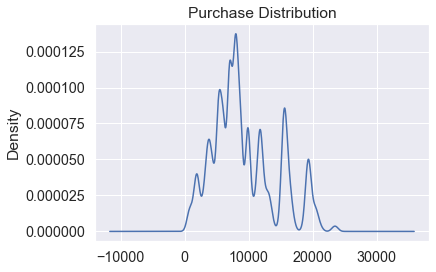

In [106]:
ax = data_train['Purchase'].plot.kde()
plt.title("Purchase Distribution")

In [107]:
data_train['Purchase'].corr(data_train['PD1_PD2_PD3_Pur_Mean'])

0.7678146444981816

__Correlation of all features with Target feature i.e 'Purchase'__

In [108]:
data_train.corr()['Purchase']

Gender                        0.060056
Age                           0.018214
Occupation                    0.061009
Stay_In_Current_City_Years    0.005415
Marital_Status                0.000850
Product_Category_1            0.750277
Product_Category_2            0.374607
Product_Category_3            0.323777
Purchase                      1.000000
Gen_Occ_Mean                  0.083102
Gen_StayDur_Mean              0.061003
Gen_MarSts_Mean               0.060478
Age_MarSts_Mean               0.027796
StayDur_CityCat_Mean          0.073544
Occ_Pur_mean                  0.061009
Age_Occ_Pur_Mean              0.086297
Age_Gen_Pur_Mean              0.066395
PD1_PD2_PD3_Pur_Mean          0.767815
Occ_StayDur_Pur_Mean          0.074608
Age_CityCat_Mean              0.080007
City_A                       -0.046267
City_B                       -0.022992
City_C                        0.069013
Name: Purchase, dtype: float64

# FEATURE SELECTION

In [109]:
#Splitting the training set into independent/dependent features
X_train = data_train
X_train = X_train.drop(['Purchase'], axis = 1)
y_train = data_train['Purchase']

In [110]:
#Splitting the testing set into independent/dependent features
X_test = data_test
X_test = X_test.drop(['Purchase'], axis = 1)
y_test = data_test['Purchase']

In [111]:
X_train.shape

(440054, 22)

In [112]:
X_test.shape

(105861, 22)

In [113]:
y_train.shape

(440054,)

In [114]:
y_test.shape

(105861,)

<b>RFE (Recursive Feature Elimination) </b>

In [115]:
regressor = RandomForestRegressor()

In [116]:
rfe = RFE(estimator=regressor, step=1)
rfe = rfe.fit(X_train, y_train)

In [117]:
selected_rfe_features = pd.DataFrame({'Feature':list(X_train.columns),
                                      'Ranking':rfe.ranking_})
selected_rfe_features.sort_values(by='Ranking')

,Feature,Ranking
10,Gen_MarSts_Mean,1
17,Occ_StayDur_Pur_Mean,1
16,PD1_PD2_PD3_Pur_Mean,1
14,Age_Occ_Pur_Mean,1
12,StayDur_CityCat_Mean,1
11,Age_MarSts_Mean,1
18,Age_CityCat_Mean,1
8,Gen_Occ_Mean,1
9,Gen_StayDur_Mean,1
5,Product_Category_1,1


In [118]:
#Extracting all the features with Rank 1
X_train_rfe = rfe.transform(X_train)
X_val_rfe = rfe.transform(X_test)
X_test_rfe = rfe.transform(test)

In [119]:
X_train_rfe

array([[3.00000000e+00, 1.00000000e+00, 8.33147924e+03, ...,
        1.29748309e+04, 8.97264498e+03, 8.63150630e+03],
       [3.00000000e+00, 1.00000000e+00, 8.33147924e+03, ...,
        1.29748309e+04, 8.97264498e+03, 8.63150630e+03],
       [3.00000000e+00, 2.00000000e+00, 8.33147924e+03, ...,
        1.34370658e+04, 8.97264498e+03, 8.63150630e+03],
       ...,
       [3.00000000e+00, 1.00000000e+00, 9.62508390e+03, ...,
        1.24210823e+04, 9.57869686e+03, 8.58689653e+03],
       [2.00000000e+00, 2.00000000e+00, 9.62508390e+03, ...,
        7.10746764e+03, 9.57869686e+03, 8.58689653e+03],
       [1.00000000e+00, 1.00000000e+00, 9.62508390e+03, ...,
        3.05067267e+03, 9.57869686e+03, 8.58689653e+03]])

In [120]:
X_train.shape

(440054, 22)

In [121]:
X_test.shape

(105861, 22)

In [122]:
X_test_rfe.shape

(233599, 11)

<b> The following feature selection method were used which caused Memory Error or were not taken into consideration</b> 

<blockquote> SelectKBest </blockquote>

In [123]:
#Univariate feature selection
"""
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 5 features
select_feature = SelectKBest(chi2, k=5).fit(x_train, y_train)
"""

'\nfrom sklearn.feature_selection import SelectKBest\nfrom sklearn.feature_selection import chi2\n# find best scored 5 features\nselect_feature = SelectKBest(chi2, k=5).fit(x_train, y_train)\n'

<blockquote>LASSO</blockquote> 

In [124]:
"""
lasso = Lasso(alpha=0.1)
lasso_coef=lasso.fit(X_train,y_train).coef_
_=plt.plot(range(len(X_train)),lasso_coef)
_=plt.xticks(range(len(X_train)),X_train,rotation=60)
_=plt.ylabel("Coefficients")
y_pred_train=Lasso_reg.predict(X_train)
y_pred_test=Lasso_reg.predict(X_test)
plt.show()
"""

'\nlasso = Lasso(alpha=0.1)\nlasso_coef=lasso.fit(X_train,y_train).coef_\n_=plt.plot(range(len(X_train)),lasso_coef)\n_=plt.xticks(range(len(X_train)),X_train,rotation=60)\n_=plt.ylabel("Coefficients")\ny_pred_train=Lasso_reg.predict(X_train)\ny_pred_test=Lasso_reg.predict(X_test)\nplt.show()\n'

# Model Prediction With Decision Tree Regressor 

<blockquote><b><u>On Validation Set</u> </b></blockquote>

In [125]:
#instantiate a DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=15,
                          min_samples_leaf=100,
                          random_state=3)

In [126]:
#Fit 'dt' into the training set
dt.fit(X_train_rfe,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=15,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=100, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=3, splitter='best')

In [127]:
#Predict validation-set labels
y_DTR_pred = dt.predict(X_val_rfe)

<b> Accuracy </b>

In [128]:
print(dt.score(X_val_rfe,y_test))

0.602464220446018


<blockquote><b><u>On Test Set</u> </b></blockquote>

In [129]:
#Predict test-set labels
y_test_DTR_pred = dt.predict(X_test_rfe)

In [130]:
y_test_DTR_pred

array([14484.33455882, 14484.33455882, 14484.33455882, ...,
        2083.55855856, 19910.82      , 16295.25862069])

# Model prediction with XGBoost

<blockquote><b><u>On Validation Set</u> </b></blockquote>

In [131]:
xgb_reg = xgb.XGBRegressor(n_estimators=1000,learning_rate=1.0, max_depth=8, min_child_weight=36, seed=0)
xgb_reg.fit(X_train_rfe, y_train)
y_XGB_pred = xgb_reg.predict(X_val_rfe)

[02:37:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


<b> Accuracy </b>

In [132]:
print(xgb_reg.score(X_val_rfe,y_test))

0.5955456069793946


<blockquote><b><u>On Test Set</u> </b></blockquote>

In [133]:
#Predict test-set labels
y_test_XGB_pred = xgb_reg.predict(X_test_rfe)

In [134]:
y_test_XGB_pred

array([15133.153 , 15133.153 , 15133.153 , ...,  2475.3777, 24044.201 ,
       16883.615 ], dtype=float32)

# Regression Error Metrics

<blockquote><b>Model: DECISION TREE REGRESSOR</b></blockquote>

<b>MEAN SQUARE ERROR</b>

In [135]:
print("MSE:"+str(mean_squared_error(y_DTR_pred,y_test)))

MSE:9894293.375118542


<b>ROOT MEAN SQUARE ERROR</b>

In [136]:
print("RMSE:"+str(np.sqrt(mean_squared_error(y_DTR_pred,y_test))))

RMSE:3145.519571568192


<b>MEAN ABSOLUTE ERROR</b>

In [137]:
print("MAE:"+str(mean_absolute_error(y_DTR_pred,y_test)))

MAE:2386.1246912910287


<blockquote><b>Model: XGBOOST REGRESSOR</b></blockquote>

<b>MEAN SQUARE ERROR</b>

In [138]:
print("MSE:"+str(mean_squared_error(y_XGB_pred,y_test)))

MSE:10066491.187010143


<b>ROOT MEAN SQUARE ERROR</b>

In [139]:
print("RMSE:"+str(np.sqrt(mean_squared_error(y_XGB_pred,y_test))))

RMSE:3172.7734219465065


<b>MEAN ABSOLUTE ERROR</b>

In [140]:
print("MAE:"+str(mean_absolute_error(y_XGB_pred,y_test)))

MAE:2378.406957127637


In [169]:
selected_features_using_rfe = [
                'Gen_MarSts_Mean',
                'Occ_StayDur_Pur_Mean',
                'PD1_PD2_PD3_Pur_Mean',
                'Age_Occ_Pur_Mean',
                'StayDur_CityCat_Mean',
                'Age_MarSts_Mean',
                'Age_CityCat_Mean',
                'Gen_Occ_Mean',
                'Gen_StayDur_Mean',
                'Product_Category_1',
                'Product_Category_3',
]

In [175]:
df1 = X_train[selected_features_using_rfe]
df1['Purchase'] = y_train
df1

C:\Users\ankit.banerjee\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Gen_MarSts_Mean,Occ_StayDur_Pur_Mean,PD1_PD2_PD3_Pur_Mean,Age_Occ_Pur_Mean,StayDur_CityCat_Mean,Age_MarSts_Mean,Age_CityCat_Mean,Gen_Occ_Mean,Gen_StayDur_Mean,Product_Category_1,Product_Category_3,Purchase
0,8746.942937,8972.644981,12974.830939,8981.565408,9007.159885,9032.220539,8631.506300,8331.479237,8817.825081,3,1,8370
1,8746.942937,8972.644981,12974.830939,8981.565408,9007.159885,9032.220539,8631.506300,8331.479237,8817.825081,3,1,11011
2,8746.942937,8972.644981,13437.065778,8981.565408,9007.159885,9032.220539,8631.506300,8331.479237,8817.825081,3,2,15200
3,8746.942937,8972.644981,13437.065778,8981.565408,9007.159885,9032.220539,8631.506300,8331.479237,8817.825081,3,2,9545
4,8746.942937,8972.644981,13437.065778,8981.565408,9007.159885,9032.220539,8631.506300,8331.479237,8817.825081,3,2,19219
...,...,...,...,...,...,...,...,...,...,...,...,...
440049,9508.635429,9578.696858,6742.960592,9513.456177,8964.652748,9656.650799,8586.896527,9625.083899,9544.399870,2,1,7148
440050,9508.635429,9578.696858,6742.960592,9513.456177,8964.652748,9656.650799,8586.896527,9625.083899,9544.399870,2,1,4170
440051,9508.635429,9578.696858,12421.082308,9513.456177,8964.652748,9656.650799,8586.896527,9625.083899,9544.399870,3,1,8284
440052,9508.635429,9578.696858,7107.467642,9513.456177,8964.652748,9656.650799,8586.896527,9625.083899,9544.399870,2,2,9779


In [177]:
df2 = X_test[selected_features_using_rfe]
df2['Purchase'] = y_test
df2

C:\Users\ankit.banerjee\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Gen_MarSts_Mean,Occ_StayDur_Pur_Mean,PD1_PD2_PD3_Pur_Mean,Age_Occ_Pur_Mean,StayDur_CityCat_Mean,Age_MarSts_Mean,Age_CityCat_Mean,Gen_Occ_Mean,Gen_StayDur_Mean,Product_Category_1,Product_Category_3,Purchase
0,9508.635429,8947.070511,12490.197514,9155.760528,9241.767152,9295.186116,9199.458877,9281.867548,9468.120479,3.0,3,19509
1,9508.635429,8947.070511,12490.197514,9155.760528,9241.767152,9295.186116,9199.458877,9281.867548,9468.120479,3.0,3,10755
2,9508.635429,8947.070511,12490.197514,9155.760528,9241.767152,9295.186116,9199.458877,9281.867548,9468.120479,3.0,3,18978
3,9508.635429,8947.070511,12490.197514,9155.760528,9241.767152,9295.186116,9199.458877,9281.867548,9468.120479,3.0,3,12762
4,9508.635429,8947.070511,12490.197514,9155.760528,9241.767152,9295.186116,9199.458877,9281.867548,9468.120479,3.0,3,3682
...,...,...,...,...,...,...,...,...,...,...,...,...
105856,9508.635429,9208.708834,14312.942397,8981.565408,8964.652748,9032.220539,8631.506300,9418.365708,9544.399870,3.0,1,19428
105857,9508.635429,9208.708834,15302.436568,8981.565408,8964.652748,9032.220539,8631.506300,9418.365708,9544.399870,4.0,1,20283
105858,9508.635429,9208.708834,16555.510123,8981.565408,8964.652748,9032.220539,8631.506300,9418.365708,9544.399870,4.0,2,20287
105859,9508.635429,9208.708834,16555.510123,8981.565408,8964.652748,9032.220539,8631.506300,9418.365708,9544.399870,4.0,2,23274


In [178]:
df3 = df1.append(df2)

In [179]:
df3.shape

(545915, 12)

In [180]:
df3

,Gen_MarSts_Mean,Occ_StayDur_Pur_Mean,PD1_PD2_PD3_Pur_Mean,Age_Occ_Pur_Mean,StayDur_CityCat_Mean,Age_MarSts_Mean,Age_CityCat_Mean,Gen_Occ_Mean,Gen_StayDur_Mean,Product_Category_1,Product_Category_3,Purchase
0,8746.942937,8972.644981,12974.830939,8981.565408,9007.159885,9032.220539,8631.5063,8331.479237,8817.825081,3.0,1,8370
1,8746.942937,8972.644981,12974.830939,8981.565408,9007.159885,9032.220539,8631.5063,8331.479237,8817.825081,3.0,1,11011
2,8746.942937,8972.644981,13437.065778,8981.565408,9007.159885,9032.220539,8631.5063,8331.479237,8817.825081,3.0,2,15200
3,8746.942937,8972.644981,13437.065778,8981.565408,9007.159885,9032.220539,8631.5063,8331.479237,8817.825081,3.0,2,9545
4,8746.942937,8972.644981,13437.065778,8981.565408,9007.159885,9032.220539,8631.5063,8331.479237,8817.825081,3.0,2,19219
...,...,...,...,...,...,...,...,...,...,...,...,...
105856,9508.635429,9208.708834,14312.942397,8981.565408,8964.652748,9032.220539,8631.5063,9418.365708,9544.399870,3.0,1,19428
105857,9508.635429,9208.708834,15302.436568,8981.565408,8964.652748,9032.220539,8631.5063,9418.365708,9544.399870,4.0,1,20283
105858,9508.635429,9208.708834,16555.510123,8981.565408,8964.652748,9032.220539,8631.5063,9418.365708,9544.399870,4.0,2,20287
105859,9508.635429,9208.708834,16555.510123,8981.565408,8964.652748,9032.220539,8631.5063,9418.365708,9544.399870,4.0,2,23274


In [181]:
#Splitting the data set into independent/dependent features
X_cross = df3
X_cross = X_cross.drop(['Purchase'], axis = 1)
y_cross = df3['Purchase']

In [186]:
kf = KFold(n_splits=5,random_state=42,shuffle=True)

# K-Fold Cross Validation

<b> Method to calculate score of any model provided </b>

In [221]:
def get_score(model,X_cross_train,X__cross_test,y_cross_train,y_cross_test):
    model.fit(X_cross_train,y_cross_train)
    return model.score(X__cross_test,y_cross_test)

In [222]:
#List used for storing the scores of the model in each iteration of KFold Cross Validation
scores_decisionTreeReg = []
scores_XGBoostReg = []

<b> KFold Cross Validation Technique is used to identify the best model possible for our present dataset</b>

In [224]:
for train_index, test_index in kf.split(X_cross,y_cross):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_cross_train,X__cross_test = X_cross.iloc[train_index], X_cross.iloc[test_index]
    y_cross_train,y_cross_test = y_cross.iloc[train_index], y_cross.iloc[test_index]
    
    scores_decisionTreeReg.append(get_score(DecisionTreeRegressor(max_depth=15,min_samples_leaf=100,random_state=3),X_cross_train,X__cross_test,y_cross_train,y_cross_test))
    scores_XGBoostReg.append(get_score(xgb.XGBRegressor(n_estimators=1000,learning_rate=1.0, max_depth=8, min_child_weight=36, seed=0),X_cross_train,X__cross_test,y_cross_train,y_cross_test))
    

TRAIN: [     0      1      3 ... 545911 545912 545913] TEST: [     2      6      7 ... 545904 545907 545914]
[05:12:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
TRAIN: [     0      1      2 ... 545911 545912 545914] TEST: [    10     11     26 ... 545903 545909 545913]
[05:24:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
TRAIN: [     1      2      3 ... 545912 545913 545914] TEST: [     0      4     12 ... 545901 545908 545911]
[05:30:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
TRAIN: [     0      2      4 ... 545911 545913 545914] TEST: [     1      3      8 ... 545902 545910 545912]
[05:36:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
TRAIN: [     0      1      2 ... 545912 545913 545914] TEST: [     5     13     14 ... 545899 545905

<b> List of scores of the model : <font color="blue">Decision Tree Regressor</font></b>

In [225]:
scores_decisionTreeReg

[0.6051837718107449,
 0.6031370319620635,
 0.5991620649847117,
 0.6066594637108813,
 0.6076462866171304]

<b> List of scores of the model : <font color="blue">XGBoost Regressor</font></b>

In [226]:
scores_XGBoostReg

[0.5975704759765047,
 0.5932526512880955,
 0.5888595456604575,
 0.5982868173596323,
 0.5993714092624087]

<b> Mean score of the model : <font color="blue">Decision Tree Regressor</font></b>

In [230]:
statistics.mean(scores_decisionTreeReg) 

0.6043577238171064

<b> Mean score of the model : <font color="blue">XGBoost Regressor</font></b>

In [232]:
statistics.mean(scores_XGBoostReg)

0.5954681799094197

<u><b><font color="green">Conclusion:</font></b></u><br>
<b> Score of <u><font color="blue">Decision Tree Regressor</font></u> is giving the best performance on the validation set</b>